# Google App Store (EDA)

## Introduction

### About the Dataset

The Google Play Store is one of the largest platforms for Android applications, offering millions of apps across a wide range of categories, including Games, Productivity, Health, and more. It serves as the primary distribution channel for Android developers to publish, promote, and monetize their applications to a global user base.

This dataset provides detailed information on a variety of apps available on the Google Play Store. Each row represents a unique app and includes attributes such as app name, category, rating, number of reviews and more.The data was originally scraped from the Google Play Store. Without access to this platform and the efforts involved in compiling it, such analysis would not be possible.

The Google Play Store dataset offers valuable insights for developers, marketers, and analysts. By examining patterns in installs, ratings, and pricing, businesses can uncover what makes successful apps stand out. This analysis can help guide app development decisions, marketing strategies, and user engagement approaches in an increasingly competitive mobile app ecosystem.

### Tasks

* Conduct a general EDA to understand the structure, distribution, and trends in the Google Play Store dataset.

* Clean the data by handling missing values, inconsistent formatting, and removing or transforming outliers.

* Identify and visualize the most common app categories and compare their characteristics (e.g., size, rating, reviews, installs).

* Analyze the relationship between numerical features such as reviews, installs, and app size, including applying log transformations to handle skewed data and outliers.

* Compare app performance (e.g., installs and reviews) across key categories like Game and Family, and explore how they differ in popularity and size.

* Explore correlations between numerical variables to uncover potential dependencies or patterns.

* Investigate how different factors (e.g., app size, price, type) influence ratings.

* Evaluate the impact of free vs. paid apps across installs, reviews, and user ratings.

* Generate actionable insights that could help app developers or marketers optimize app strategies on the Play Store.

## Preparation

### Loading the Libraries

Loading Python relevant libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [21]:
pd.__version__

'2.2.1'

### Specific Notebook Parameters

In [22]:
pd.set_option('max_colwidth', 400)
plt.style.use('ggplot')

### Loading the Data

Loading the Google Play Store dataset into a DataFrame

In [32]:
#df = pd.read_csv('googleplaystore.csv')
url = 'https://raw.githubusercontent.com/Adi-Shalit/EDA/main/googleplaystore.csv'
df = pd.read_csv(url)

### Understanding the Data

Basic details about the data set

#### Data Shape

In [33]:
print(f'This Dataframe has {df.shape[0]} rows over {df.shape[1]} columns')

This Dataframe has 10840 rows over 13 columns


#### Sampling rows

In [34]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7838,What's Your CS:GO rank?,GAME,2.3,278,2.4M,"10,000+",Free,0,Teen,Trivia,"February 11, 2017",1,2.3 and up
6068,Free GPS Navigation,MAPS_AND_NAVIGATION,4.2,618562,Varies with device,"50,000,000+",Free,0,Everyone,Maps & Navigation,"June 4, 2018",Varies with device,Varies with device
3004,Mercato foot by Maxifoot,SPORTS,4.4,697,3.0M,"100,000+",Free,0,Everyone,Sports,"March 16, 2017",1.1,4.1 and up
6445,B L Enterprises,FINANCE,NaN,2,6.9M,10+,Free,0,Everyone,Finance,"May 11, 2018",1.8,4.0.3 and up
4506,Q Avatar (Avatar Maker),COMICS,4.4,2012,3.6M,"100,000+",Free,0,Everyone,Comics,"March 4, 2017",1.3.5,2.3 and up
8025,CW Deposit,BUSINESS,3.0,4,498k,"1,000+",Free,0,Everyone,Business,"February 6, 2014",2.1.5,2.1 and up
9600,Boyaa Poker (En) – Social Texas Hold’em,GAME,4.3,71468,51M,"1,000,000+",Free,0,Teen,Card,"June 12, 2018",5.8.0,4.1 and up
6198,Backgammon NJ for Android,GAME,4.4,1644,15M,"10,000+",Paid,$7.99,Everyone,Board,"April 5, 2017",4.1,2.3.3 and up
1709,Score! Hero,GAME,4.6,5418675,96M,"100,000,000+",Free,0,Everyone,Sports,"June 13, 2018",1.751,4.4 and up
9573,"Maps, GPS Navigation & Directions, Street View",MAPS_AND_NAVIGATION,4.2,207440,6.4M,"10,000,000+",Free,0,Everyone,Maps & Navigation,"July 23, 2018",7.0.3,4.0 and up


#### Data Dictionary

* <b>App<b> - Name of the app available on Google Play Store.
* <b>Category<b> - The category the app belongs to (e.g., "Education", "Finance", "Health & Fitness").
* <b>Rating<b> - Average user rating of the app, ranging from 1 to 5. Can have missing values.
* <b>Reviews <b>- Number of user reviews of the app.
* <b>Size <b>- Size of the app in MB or KB, or "Varies with device" if applicable.
* <b>Installs <b>- Number of times the app has been installed, formatted as a string with commas (e.g., "1,000,000+").
* <b>Type - App type: either "Free" or "Paid".
* <b>Price - The price of the app. If free, it is "0". Paid apps show the price (in $).
* <b>Content Rating - Age group the app is appropriate for (e.g., "Everyone", "Teen", "Mature 17+").
* <b>Genres - List of genres associated with the app (e.g., "Action", "Puzzle").
* <b>Last Updated - The date when the app was last updated.
* <b>Current Ver - The current version of the app.
* <b>Android Ver - The minimum Android version required to run the app.

### Cleanup

In the following section we'll remove unnecessary columns and deal with empty and duplicated rows.

#### Validating Datatypes

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


<b>Converting 'Price' column into a float64 type</b>

In [36]:
df['Price'] = pd.to_numeric(df['Price'].str.replace('$', ''))

In [37]:
df['Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10840 entries, 0 to 10839
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
10840 non-null  float64
dtypes: float64(1)
memory usage: 84.8 KB


<b>Converting 'Installs' column into a valid int32 column</b>

In [38]:
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

In [39]:
df['Installs'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10840 entries, 0 to 10839
Series name: Installs
Non-Null Count  Dtype
--------------  -----
10840 non-null  int32
dtypes: int32(1)
memory usage: 42.5 KB


By cleaning the data this way, we ensure that the Installs and Price columns contain valid numeric values that can be used in further analysis.

<b>Converting 'Last Updated' column into a valid datetime64 type</b>

In [40]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format='%B %d, %Y')

In [41]:
df[['Last Updated']].head()

,Last Updated
0,2018-01-07
1,2018-01-15
2,2018-08-01
3,2018-06-08
4,2018-06-20


In [42]:
df[['Last Updated']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Last Updated  10840 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 84.8 KB


Extracting the year and month from the Last Updated column

In [43]:
df['Year'] = df['Last Updated'].dt.year
df['Month'] = df['Last Updated'].dt.month

Converting the column to a datetime format and creating 2 additional columns that seperated the year and month, will allow us to:
* Finding the frequency of updates over the years.
* Grouping the data by year or month to see trends.
* Analyzing how the number of installs or ratings changes over time.
* Creating time series plots.

<b>Converting 'Android Ver' into a float64 type</b>

Extracting the first version before the hyphen in a range (x.y - a.b)

In [44]:
df['Android Version Numeric'] = df['Android Ver'].str.split('-').str[0].str.extract(r'(\d+\.\d+)')[0]

<b>Converting the extracted version to numeric (float64) type</b>

In [45]:
df['Android Version Numeric'] = pd.to_numeric(df['Android Version Numeric'], errors='coerce')

Checking the first few rows to see the result

In [46]:
df[['Android Ver', 'Android Version Numeric']].head()

,Android Ver,Android Version Numeric
0,4.0.3 and up,4.0
1,4.0.3 and up,4.0
2,4.0.3 and up,4.0
3,4.2 and up,4.2
4,4.4 and up,4.4


In [47]:
df.isnull().sum()

App                           0
Category                      0
Rating                     1474
Reviews                       0
Size                          0
Installs                      0
Type                          1
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   8
Android Ver                   2
Year                          0
Month                         0
Android Version Numeric    1364
dtype: int64

Original column 'Android Ver' contains 2 Nan values, while the new column 'Android Version Numeric' contains 1364 Nan values.

Checking the rows where version extraction failed

In [48]:
df_invalid_rows = df[df['Android Version Numeric'].isnull()]
print(df_invalid_rows[['Android Ver', 'Android Version Numeric']].sample(40))

              Android Ver  Android Version Numeric
2597   Varies with device                      NaN
4592   Varies with device                      NaN
3652   Varies with device                      NaN
819    Varies with device                      NaN
6479   Varies with device                      NaN
4137   Varies with device                      NaN
2656   Varies with device                      NaN
1723   Varies with device                      NaN
5664   Varies with device                      NaN
784    Varies with device                      NaN
1095   Varies with device                      NaN
3471   Varies with device                      NaN
9465   Varies with device                      NaN
6486   Varies with device                      NaN
5345   Varies with device                      NaN
2783   Varies with device                      NaN
422    Varies with device                      NaN
5603   Varies with device                      NaN
10508  Varies with device      

We can see that the sample shows that the Nan values that appear in the new float64 column are a result of 'Varies with device' values that appear in the original column, so that's ok.

<b>Converting 'Current Ver' into a float64 type</b>

Function to check if a string is a valid version by confirming that all characters are either numbers or dots.

In [49]:
def is_valid_version(version):
    # Loop through each character in the version string
    for character in version:
        # Check if the character is not a digit or a dot
        if not (character.isdigit() or character == '.'):
            # If any character is not a digit or dot, return False (invalid version)
            return False
    # If all characters are digits or dots, return True (valid version)
    return True

Function to extract the major and minor version parts from the version string.
It removes any non-numeric characters except dots, and keeps single-number versions (like '1', '4', etc.) as valid.

In [50]:
def extract_version(version):
    if isinstance(version, str):
        # Use regex to remove any non-numeric characters except the dot (.)
        version_cleaned = re.sub(r'[^0-9.]', '', version)  # Remove everything except digits and dots
        # Ensure the cleaned version isn't just a dot and has numbers
        if version_cleaned and version_cleaned != '.' and is_valid_version(version_cleaned):
            parts = version_cleaned.split('.')
            if len(parts) >= 2:  # Ensure we have at least major and minor version parts
                # Combine first two parts as a float, ensuring the string is properly formatted
                return float(parts[0] + '.' + parts[1])  
            elif len(parts) == 1:  # If there is only one part (major version)
                return float(parts[0])  # Treat it as a valid version with just the major number
    return None  # Return None for invalid versions or other strings

Applying the function to the 'Current Ver' column

In [51]:
df['Current Ver Cleaned'] = df['Current Ver'].apply(extract_version)

In [52]:
df['Current Ver Cleaned'].describe()

count    9.356000e+03
mean     8.791591e+15
std      8.503791e+17
min      0.000000e+00
25%      1.100000e+00
50%      2.000000e+00
75%      3.700000e+00
max      8.225413e+19
Name: Current Ver Cleaned, dtype: float64

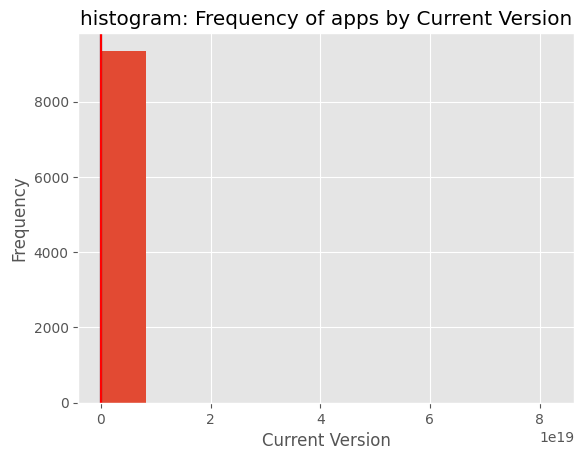

In [53]:
plt.hist(df['Current Ver Cleaned'], bins = 10)
plt.axvline(x = df['Current Ver Cleaned'].median(), color = 'green')
plt.axvline(x = df['Current Ver Cleaned'].mean(), color = 'blue')
Q1 = df['Current Ver Cleaned'].quantile(0.25)
Q3 = df['Current Ver Cleaned'].quantile(0.75)
IQR = Q3 - Q1
lowerThreshold = Q1 - 1.5 * IQR
UpperThreshold = Q3 + 1.5 * IQR
plt.axvline(x = lowerThreshold, color = 'red')
plt.axvline(x = UpperThreshold, color = 'red')
plt.xlabel('Current Version')
plt.ylabel('Frequency')
plt.title('histogram: Frequency of apps by Current Version')
plt.show()

Applying filter to avoid outliners (check the max value)

In [54]:
df['Current Ver Cleaned'] = df['Current Ver Cleaned'] = df['Current Ver Cleaned'].mask(df['Current Ver Cleaned'] >= 20, np.nan)

In [55]:
df[['Current Ver', 'Current Ver Cleaned']].head(20)

,Current Ver,Current Ver Cleaned
0,1.0.0,1.0
1,2.0.0,2.0
2,1.2.4,1.2
3,Varies with device,NaN
4,1.1,1.1
5,1,1.0
6,1.1,1.1
7,6.1.61.1,6.1
8,2.9.2,2.9
9,2.8,2.8


In [56]:
df['Current Ver Cleaned'].describe()

count    9116.000000
mean        2.803839
std         2.698157
min         0.000000
25%         1.100000
50%         1.900000
75%         3.400000
max        19.200000
Name: Current Ver Cleaned, dtype: float64

Counting the number of invalid entries

In [58]:
df_invalid_values = df['Current Ver Cleaned'].isnull().sum()
df_total_values = df['Current Ver'].isnull().sum()

In [59]:
df.isnull().sum()

App                           0
Category                      0
Rating                     1474
Reviews                       0
Size                          0
Installs                      0
Type                          1
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   8
Android Ver                   2
Year                          0
Month                         0
Android Version Numeric    1364
Current Ver Cleaned        1724
dtype: int64

Original column 'Current Ver' contains 8 Nan values, while the new column 'Current Ver Cleaned' contains 1724 Nan values.

Checking the rows where version extraction failed

In [60]:
df_invalid_rows = df[df['Current Ver Cleaned'].isnull()]
print(df_invalid_rows[['Current Ver', 'Current Ver Cleaned']].sample(40))

              Current Ver  Current Ver Cleaned
3551   Varies with device                  NaN
10312                  34                  NaN
5014   Varies with device                  NaN
3702   Varies with device                  NaN
207    Varies with device                  NaN
491    Varies with device                  NaN
394    Varies with device                  NaN
5077   Varies with device                  NaN
9055             Human Dx                  NaN
352                24.6.6                  NaN
5580             20180620                  NaN
454    Varies with device                  NaN
3743   Varies with device                  NaN
411    Varies with device                  NaN
10258            2018.8.1                  NaN
2758   Varies with device                  NaN
4451      v2018.Apr.12.16                  NaN
294    Varies with device                  NaN
4241   Varies with device                  NaN
4724   Varies with device                  NaN
2478         

We can see that the sample shows that the Nan values that appear in the new float64 column are a result of 'Varies with device' values or values that are over 20 (outliners) that appear in the original column, so that's ok.

<b>Converting 'Size' into a float64 type, a size in Mega-Byte format by a function:
Remove 'M', 'k' and convert to numeric format</b>

In [61]:
def convert_size(size):
    if isinstance(size, str):  # Check if it's a string
        if 'M' in size:  # If the size is in MB
            return float(size.replace('M', ''))  # Remove 'M' and convert to float
        elif 'k' in size:  # If the size is in KB
            return float(size.replace('k', '')) / 1024  # Convert KB to MB
        elif size == 'Varies with device':  # Handle special case
            return np.nan  # Return NaN for 'Varies with device'
        else:
            return np.nan  # Return NaN for any other unexpected values
    return np.nan  # Return NaN for non-string unexepected values

Applying the function to the new 'Size_MB' column 

In [62]:
df['Size_MB'] = df['Size'].apply(convert_size)

In [63]:
df['Size_MB'] = df['Size_MB'].round(4)

Checking the result

In [64]:
print(df[['Size', 'Size_MB']].head(50))

                  Size  Size_MB
0                  19M     19.0
1                  14M     14.0
2                 8.7M      8.7
3                  25M     25.0
4                 2.8M      2.8
5                 5.6M      5.6
6                  19M     19.0
7                  29M     29.0
8                  33M     33.0
9                 3.1M      3.1
10                 28M     28.0
11                 12M     12.0
12                 20M     20.0
13                 21M     21.0
14                 37M     37.0
15                2.7M      2.7
16                5.5M      5.5
17                 17M     17.0
18                 39M     39.0
19                 31M     31.0
20                 14M     14.0
21                 12M     12.0
22                4.2M      4.2
23                7.0M      7.0
24                 23M     23.0
25                6.0M      6.0
26                 25M     25.0
27                6.1M      6.1
28                4.6M      4.6
29                4.2M      4.2
30      

In [65]:
df.isnull().sum()

App                           0
Category                      0
Rating                     1474
Reviews                       0
Size                          0
Installs                      0
Type                          1
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   8
Android Ver                   2
Year                          0
Month                         0
Android Version Numeric    1364
Current Ver Cleaned        1724
Size_MB                    1695
dtype: int64

Original column 'Size' contains 0 Nan values, while the new column 'Size_MB' contains 1695 Nan values.

Checking the rows where version extraction failed

In [66]:
df_invalid_rows = df[df['Size_MB'].isnull()]
print(df_invalid_rows[['Size', 'Size_MB']].sample(40))

                     Size  Size_MB
4039   Varies with device      NaN
1463   Varies with device      NaN
9439   Varies with device      NaN
4374   Varies with device      NaN
10150  Varies with device      NaN
3246   Varies with device      NaN
1684   Varies with device      NaN
8929   Varies with device      NaN
406    Varies with device      NaN
1914   Varies with device      NaN
1058   Varies with device      NaN
10197  Varies with device      NaN
462    Varies with device      NaN
4951   Varies with device      NaN
3450   Varies with device      NaN
5772   Varies with device      NaN
1146   Varies with device      NaN
3284   Varies with device      NaN
3451   Varies with device      NaN
508    Varies with device      NaN
6485   Varies with device      NaN
6161   Varies with device      NaN
9659   Varies with device      NaN
6654   Varies with device      NaN
6373   Varies with device      NaN
1605   Varies with device      NaN
3767   Varies with device      NaN
8667   Varies with d

We can see that the sample shows that the Nan values that appear in the new float64 column are a result of 'Varies with device' values that appear in the original column, so that's ok.

#### Null Values

Before, we noticed that a lot of Nan values were created because of the tranformating we preformed on several columns. Let's dive into it.

In [67]:
df.isnull().sum()

App                           0
Category                      0
Rating                     1474
Reviews                       0
Size                          0
Installs                      0
Type                          1
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   8
Android Ver                   2
Year                          0
Month                         0
Android Version Numeric    1364
Current Ver Cleaned        1724
Size_MB                    1695
dtype: int64

identifiying the type of the untouched 'Rating' column

In [68]:
df['Rating'].dtype

dtype('float64')

'Raitng' is a float64 type of column. Cheking the distribution in order to decide whether the Nan values will be replaced with the median (green) or the mean (blue)

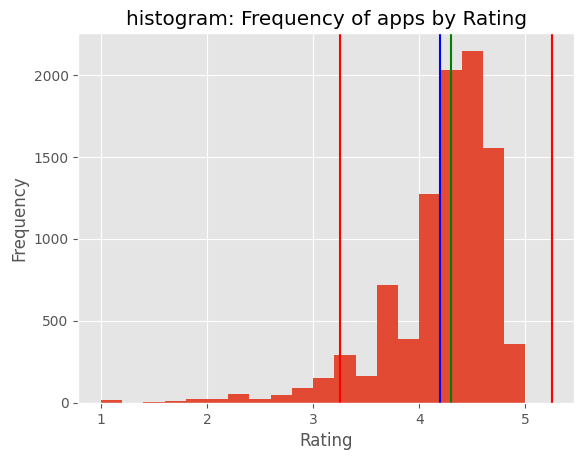

In [69]:
plt.hist(df['Rating'], bins = 20)
plt.axvline(x = df['Rating'].median(), color = 'green')
plt.axvline(x = df['Rating'].mean(), color = 'blue')
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1
lowerThreshold = Q1 - 1.5 * IQR
UpperThreshold = Q3 + 1.5 * IQR
plt.axvline(x = lowerThreshold, color = 'red')
plt.axvline(x = UpperThreshold, color = 'red')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('histogram: Frequency of apps by Rating')
plt.show()

This distribution is slightly right-skewed (a longer tail on the left), suggesting that the median might be a better choice to avoid the impact of any lower outliers (apps with very low ratings).

In [70]:
df['Rating'] = df['Rating'].replace(to_replace = np.nan, value = df['Rating'].median())

In [71]:
df.isnull().sum()

App                           0
Category                      0
Rating                        0
Reviews                       0
Size                          0
Installs                      0
Type                          1
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   8
Android Ver                   2
Year                          0
Month                         0
Android Version Numeric    1364
Current Ver Cleaned        1724
Size_MB                    1695
dtype: int64

'Android Version Numeric' - Cheking the distribution in order to decide whether the Nan values will be replaced with the median (green) or the mean (blue)

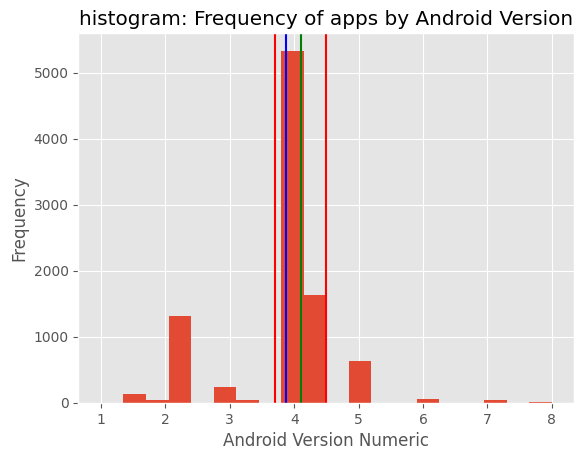

In [72]:
plt.hist(df['Android Version Numeric'], bins = 20)
plt.axvline(x = df['Android Version Numeric'].median(), color = 'green')
plt.axvline(x = df['Android Version Numeric'].mean(), color = 'blue')
Q1 = df['Android Version Numeric'].quantile(0.25)
Q3 = df['Android Version Numeric'].quantile(0.75)
IQR = Q3 - Q1
lowerThreshold = Q1 - 1.5 * IQR
UpperThreshold = Q3 + 1.5 * IQR
plt.axvline(x = lowerThreshold, color = 'red')
plt.axvline(x = UpperThreshold, color = 'red')
plt.xlabel('Android Version Numeric')
plt.ylabel('Frequency')
plt.title('histogram: Frequency of apps by Android Version')
plt.show()

The distribution has a left tail (lower versions like 2.0 and 3.0) and a right tail with some higher versions (6, 7, 8), while the bulk of the data is around version 4.0 and 5.0.
The median is likely a better choice here as well since it represents the majority of apps targeting Android versions around 4.0–5.0, without being skewed by outliers in older or newer Android versions.


In [73]:
df['Android Version Numeric'] = df['Android Version Numeric'].replace(to_replace = np.nan, value = df['Android Version Numeric'].median())

In [74]:
df.isnull().sum()

App                           0
Category                      0
Rating                        0
Reviews                       0
Size                          0
Installs                      0
Type                          1
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   8
Android Ver                   2
Year                          0
Month                         0
Android Version Numeric       0
Current Ver Cleaned        1724
Size_MB                    1695
dtype: int64

'Current Ver Cleaned' - Cheking the distribution in order to decide whether the Nan values will be replaced with the median (green) or the mean (blue)

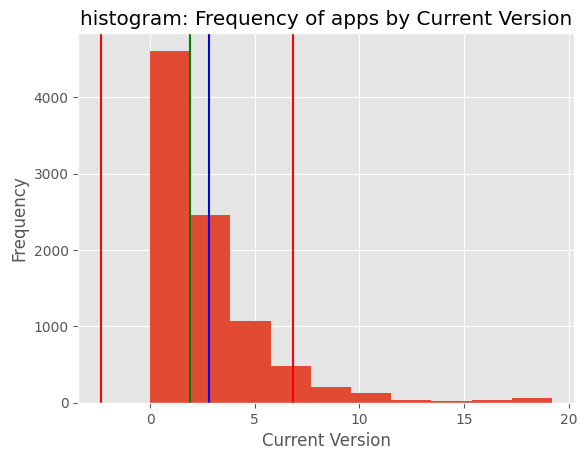

In [75]:
plt.hist(df['Current Ver Cleaned'], bins = 10)
plt.axvline(x = df['Current Ver Cleaned'].median(), color = 'green')
plt.axvline(x = df['Current Ver Cleaned'].mean(), color = 'blue')
Q1 = df['Current Ver Cleaned'].quantile(0.25)
Q3 = df['Current Ver Cleaned'].quantile(0.75)
IQR = Q3 - Q1
lowerThreshold = Q1 - 1.5 * IQR
UpperThreshold = Q3 + 1.5 * IQR
plt.axvline(x = lowerThreshold, color = 'red')
plt.axvline(x = UpperThreshold, color = 'red')
plt.xlabel('Current Version')
plt.ylabel('Frequency')
plt.title('histogram: Frequency of apps by Current Version')
plt.show()

This distribution is slightly left-skewed (a longer tail on the right), suggesting that the median might be a better choice to avoid the impact of any lower outliers 

In [76]:
df['Current Ver Cleaned'] = df['Current Ver Cleaned'].replace(to_replace = np.nan, value = df['Current Ver Cleaned'].median())

In [77]:
df.isnull().sum()

App                           0
Category                      0
Rating                        0
Reviews                       0
Size                          0
Installs                      0
Type                          1
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   8
Android Ver                   2
Year                          0
Month                         0
Android Version Numeric       0
Current Ver Cleaned           0
Size_MB                    1695
dtype: int64

'Size_MB' - Cheking the distribution in order to decide whether the Nan values will be replaced with the median (green) or the mean (blue)

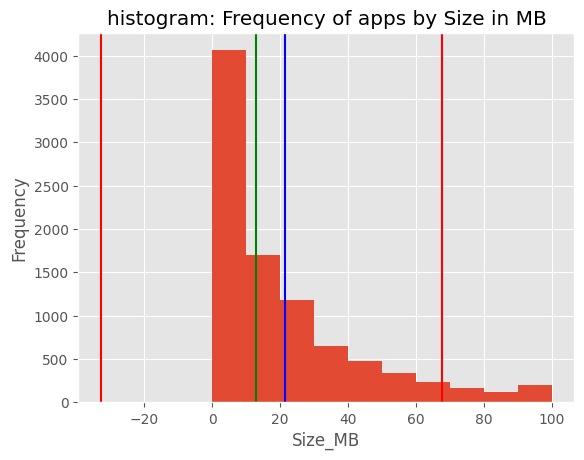

In [78]:
plt.hist(df['Size_MB'], bins = 10)
plt.axvline(x = df['Size_MB'].median(), color = 'green')
plt.axvline(x = df['Size_MB'].mean(), color = 'blue')
Q1 = df['Size_MB'].quantile(0.25)
Q3 = df['Size_MB'].quantile(0.75)
IQR = Q3 - Q1
lowerThreshold = Q1 - 1.5 * IQR
UpperThreshold = Q3 + 1.5 * IQR
plt.axvline(x = lowerThreshold, color = 'red')
plt.axvline(x = UpperThreshold, color = 'red')
plt.xlabel('Size_MB')
plt.ylabel('Frequency')
plt.title('histogram: Frequency of apps by Size in MB')
plt.show()

This distribution is slightly left-skewed (a longer tail on the right), suggesting that the median might be a better choice to avoid the impact of any lower outliers

In [79]:
df['Size_MB'] = df['Size_MB'].replace(to_replace = np.nan, value = df['Size_MB'].median())

In [80]:
df.isnull().sum()

App                        0
Category                   0
Rating                     0
Reviews                    0
Size                       0
Installs                   0
Type                       1
Price                      0
Content Rating             0
Genres                     0
Last Updated               0
Current Ver                8
Android Ver                2
Year                       0
Month                      0
Android Version Numeric    0
Current Ver Cleaned        0
Size_MB                    0
dtype: int64

One 'Type' value is missing, we can check it's price to determine if the app is free or paid.

In [81]:
df[df['Type'].isna()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Android Version Numeric,Current Ver Cleaned,Size_MB
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device,2018,6,4.1,1.9,13.0


The price is 0, meaning the Type value should be 'Free'

In [82]:
df['Type'] = df['Type'].fillna('Free')

In [83]:
df.isnull().sum()

App                        0
Category                   0
Rating                     0
Reviews                    0
Size                       0
Installs                   0
Type                       0
Price                      0
Content Rating             0
Genres                     0
Last Updated               0
Current Ver                8
Android Ver                2
Year                       0
Month                      0
Android Version Numeric    0
Current Ver Cleaned        0
Size_MB                    0
dtype: int64

In [84]:
df.shape

(10840, 18)

#### Duplicates Rows

In [85]:
df.nunique()

App                        9659
Category                     33
Rating                       39
Reviews                    6001
Size                        461
Installs                     20
Type                          2
Price                        92
Content Rating                6
Genres                      119
Last Updated               1377
Current Ver                2783
Android Ver                  33
Year                          9
Month                        12
Android Version Numeric      21
Current Ver Cleaned         606
Size_MB                     459
dtype: int64

There are apps with the same name, let's check duplucated rows

In [86]:
df[df.duplicated()].head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Android Version Numeric,Current Ver Cleaned,Size_MB
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,2018,2,4.0,1.90,13.0
236,Box,BUSINESS,4.2,159872,Varies with device,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,2018,7,4.1,1.90,13.0
239,Google My Business,BUSINESS,4.4,70991,Varies with device,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,2018,7,4.4,2.19,13.0
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,2018,7,4.0,4.10,37.0
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,2018,7,4.4,4.30,13.0
265,Box,BUSINESS,4.2,159872,Varies with device,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,2018,7,4.1,1.90,13.0
266,Zenefits,BUSINESS,4.2,296,14M,50000,Free,0.0,Everyone,Business,2018-06-15,3.2.1,4.1 and up,2018,6,4.1,3.20,14.0
267,Google Ads,BUSINESS,4.3,29313,20M,5000000,Free,0.0,Everyone,Business,2018-07-30,1.12.0,4.0.3 and up,2018,7,4.0,1.12,20.0
268,Google My Business,BUSINESS,4.4,70991,Varies with device,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,2018,7,4.4,2.19,13.0
269,Slack,BUSINESS,4.4,51507,Varies with device,5000000,Free,0.0,Everyone,Business,2018-08-02,Varies with device,Varies with device,2018,8,4.1,1.90,13.0


In [87]:
df.duplicated().sum()

483

Sorting the DataFrame by the App column to allow us to group apps with the same name together.

In [88]:
df = df.sort_values(by='App')

Checking for duplicates in the App column. By using keep=False, we keep all duplicates, not just the first occurrence.

In [89]:
df_duplicate_apps = df[df['App'].duplicated(keep=False)]

Examining the duplicate rows for differences, we can investigate whether they are different versions or if they have slight differences in other columns

In [90]:
df_duplicate_apps.head(30)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Android Version Numeric,Current Ver Cleaned,Size_MB
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,2017,2,2.3,1.9,3.8
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,2017,2,2.3,1.9,3.8
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,1000000,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up,2018,7,5.0,7.4,26.0
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,1000000,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up,2018,7,5.0,7.4,26.0
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,1000,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up,2017,1,4.0,1.0,3.8
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,1000,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up,2017,1,4.0,1.0,3.8
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,100000,Free,0.00,Everyone,Health & Fitness,2018-08-02,3.0.0,4.1 and up,2018,8,4.1,3.0,15.0
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,100000,Free,0.00,Everyone,Health & Fitness,2018-08-02,3.0.0,4.1 and up,2018,8,4.1,3.0,15.0
3083,365Scores - Live Scores,SPORTS,4.6,666521,25M,10000000,Free,0.00,Everyone,Sports,2018-07-29,5.5.9,4.1 and up,2018,7,4.1,5.5,25.0
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,10000000,Free,0.00,Everyone,Sports,2018-07-29,5.5.9,4.1 and up,2018,7,4.1,5.5,25.0


We can determine that some rows are genuine duplicates (they have the same name and no differences in other columns), so it's not a problem to drop them.

In [91]:
df.shape

(10840, 18)

In [92]:
df.duplicated().sum()

483

Dropping the duplicated rows based on those key columns

In [93]:
df = df.drop_duplicates()

The difference between the number of duplicates (483) and the actual number of rows deleted comes from hidden duplicates, rows that look identical across most fields but have minor variations in unimportant fields

In [94]:
df.shape

(10357, 18)

#### Validating rows based on common assumptions

<b>Are all apps with a non-zero price classified as "Paid", and vice versa?

Checking if all apps with a non-zero price are marked as "Paid"

In [95]:
paid_mismatch = df[(df['Price'] != 0) & (df['Type'] == 'Free')]

Checking if all apps with a price of 0 are marked as "Free"

In [96]:
free_mismatch = df[(df['Price'] == 0) & (df['Type'] == 'Paid')]

Display the results to see any mismatches

In [97]:
print("Apps with price > 0 but marked as 'Free':", paid_mismatch.shape[0])
print("Apps with price = 0 but marked as 'Paid':", free_mismatch.shape[0])

Apps with price > 0 but marked as 'Free': 0
Apps with price = 0 but marked as 'Paid': 0


No mismatches

<b>Do apps with zero installs also have zero reviews?

Checking if apps with zero installs have reviews greater than 0

In [98]:
df_install_review_mismatch = df[(df['Installs'] == 0) & (df['Reviews'] > 0)]

In [99]:
print('Apps with 0 installs but have reviews:', df_install_review_mismatch.shape[0])

Apps with 0 installs but have reviews: 0


No mismatches

<b>Do apps with zero installs also have a zero rating?

Checking if apps with zero installs have a rating greater than 0

In [100]:
df_install_rating_mismatch = df[(df['Installs'] == 0) & (df['Rating'] > 0)]

In [101]:
print("Apps with 0 installs but have a rating:", df_install_rating_mismatch.shape[0])

Apps with 0 installs but have a rating: 15


There are several mismatches, let's look at those apps

In [102]:
df_install_rating_mismatch.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Android Version Numeric,Current Ver Cleaned,Size_MB
5486,AP Series Solution Pro,FAMILY,4.3,0,7.4M,0,Paid,1.99,Everyone,Education,2017-07-30,1.3,4.0 and up,2017,7,4.0,1.3,7.4
5945,Ain Arabic Kids Alif Ba ta,FAMILY,4.3,0,33M,0,Paid,2.99,Everyone,Education,2016-04-15,1,3.0 and up,2016,4,3.0,1.0,33.0
5307,Ak Parti Yardım Toplama,SOCIAL,4.3,0,8.7M,0,Paid,13.99,Teen,Social,2017-07-28,3.4.4.3.3,4.1 and up,2017,7,4.1,3.4,8.7
8081,CX Network,BUSINESS,4.3,0,10M,0,Free,0.00,Everyone,Business,2018-08-06,1.3.1,4.1 and up,2018,8,4.1,1.3,10.0
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,Free,0.00,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device,2018,6,4.1,1.9,13.0
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,4.3,0,56M,0,Paid,3.99,Everyone,Travel & Local,2017-01-22,1.1.1,4.1 and up,2017,1,4.1,1.1,56.0
9719,EP Cook Book,MEDICAL,4.3,0,3.2M,0,Paid,200.00,Everyone,Medical,2015-07-26,1,3.0 and up,2015,7,3.0,1.0,3.2
9917,Eu Sou Rico,FINANCE,4.3,0,1.4M,0,Paid,394.99,Everyone,Finance,2018-07-11,1,4.0.3 and up,2018,7,4.0,1.0,1.4
9905,Eu sou Rico,FINANCE,4.3,0,2.6M,0,Paid,30.99,Everyone,Finance,2018-01-09,1,4.0 and up,2018,1,4.0,1.0,2.6
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0,40M,0,Paid,399.99,Everyone,Lifestyle,2017-12-01,MONEY,4.1 and up,2017,12,4.1,1.9,40.0


We can see that those apps also don't have any reviews, the amount of rows is small so it's not a problem to remove them

In [103]:
df = df[~((df['Installs'] == 0) & (df['Rating'] > 0))]

checking

In [104]:
df_install_rating_mismatch = df[(df['Installs'] == 0) & (df['Rating'] > 0)]
print("Apps with 0 installs but have a rating:", df_install_rating_mismatch.shape[0])

Apps with 0 installs but have a rating: 0


<b>Do all the apps have a higher(or equal) installs value than the Review value?

In [107]:
df_install_review_mismatch = df[(df['Reviews'] > df['Installs'])]

In [108]:
print("Apps with higher reviews than the installs:", df_install_rating_mismatch.shape[0])

Apps with higher reviews than the installs: 0


No mismatches

<b>Are all app sizes larger than 0 MB?

In [109]:
df_size_0 = df[df['Size_MB'] == 0]

In [110]:
print("Apps with size 0:", df_size_0.shape[0])

Apps with size 0: 0


No mismatches

#### Drop unnecessary columns

The following columns were duplicated and treated to turn into new numeric column, so it's no problem to drop them

In [111]:
df = df.drop(['Size', 'Current Ver', 'Android Ver'], axis=1)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10342 entries, 8884 to 882
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   App                      10342 non-null  object        
 1   Category                 10342 non-null  object        
 2   Rating                   10342 non-null  float64       
 3   Reviews                  10342 non-null  int64         
 4   Installs                 10342 non-null  int32         
 5   Type                     10342 non-null  object        
 6   Price                    10342 non-null  float64       
 7   Content Rating           10342 non-null  object        
 8   Genres                   10342 non-null  object        
 9   Last Updated             10342 non-null  datetime64[ns]
 10  Year                     10342 non-null  int32         
 11  Month                    10342 non-null  int32         
 12  Android Version Numeric  10342 non-n

In [113]:
df.shape

(10342, 15)

## EDA

### Univariate Analysis

In [114]:
df.dtypes

App                                object
Category                           object
Rating                            float64
Reviews                             int64
Installs                            int32
Type                               object
Price                             float64
Content Rating                     object
Genres                             object
Last Updated               datetime64[ns]
Year                                int32
Month                               int32
Android Version Numeric           float64
Current Ver Cleaned               float64
Size_MB                           float64
dtype: object

In [115]:
categorical = ['Category', 'Type', 'Content Rating', 'Genres']
numerical   = ['Rating', 'Reviews', 'Installs', 'Price', 'Android Version Numeric', 'Current Ver Cleaned', 'Size_MB']

In [116]:
df.describe()

,Rating,Reviews,Installs,Price,Last Updated,Year,Month,Android Version Numeric,Current Ver Cleaned,Size_MB
count,10342.000000,1.034200e+04,1.034200e+04,10342.000000,10342,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000
mean,4.203597,4.064933e+05,1.417829e+07,0.915741,2017-11-14 10:55:23.612454144,2017.383098,6.397119,3.882383,2.618847,20.076556
min,1.000000,0.000000e+00,1.000000e+00,0.000000,2010-05-21 00:00:00,2010.000000,1.000000,1.000000,0.000000,0.008300
25%,4.100000,3.300000e+01,1.000000e+03,0.000000,2017-09-04 00:00:00,2017.000000,5.000000,4.000000,1.120000,5.700000
50%,4.300000,1.696500e+03,1.000000e+05,0.000000,2018-05-20 00:00:00,2018.000000,7.000000,4.100000,1.900000,13.000000
75%,4.500000,4.668100e+04,1.000000e+06,0.000000,2018-07-19 00:00:00,2018.000000,8.000000,4.100000,3.000000,26.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,2018-08-08 00:00:00,2018.000000,12.000000,8.000000,19.200000,100.000000
std,0.485933,2.698689e+06,8.029591e+07,15.124114,NaN,1.113089,2.605775,0.795864,2.455049,21.024789


#### Summary Statistics Observations

<div style='font-size:15px'>

<b> Initial Observations: </b>
* <b> Price </b>
    * The apps ranged in price from 0 to 400 usd which sounds too much, most of the apps (75%) are free
* <b> Installs </b>
    * There are apps with only 1 installs, and the max installs for an app are 1,000,000,000, which is a great number
    * The average number of installs is approximately 14,178,293, while the 25% quantile is 1,000 and the 75% quantile is 1,000,000 indicating that        while many apps are downloaded, a few extremely popular ones skew the average significantly
* <b> Reviews </b>   
    * There are apps with no reviews, and the max reviews for an app 78,158,306, most of the reviews (75%) go up to 46,681 reviews
* <b> Reviews / Installs </b>   
    * The maximum number of reviews is about 13 times lower than the maximum number of installs
    *  The standard deviations for Reviews (2,698,688.7) and Installs (80,295,914) indicate high variability in these metrics,
        reinforcing the presence of a few outlier apps with extremely high engagement compared to the majority
    * The maximum Reviews & Installs is very great, considering the 75% percentiles, we should check these values
* <b> Rating </b>   
    * The average rating across apps is 4.2, which suggests that users generally perceive the apps positively
      with most apps scoring between 4.1 (25%) and 4.5 (75%)
    * Ratings range from 1.0 to 5.0, with the maximum rating indicating a few apps have received perfect scores (maybe because of lower installs), we
      will look into that
* <b> Size_MB </b>   
    *  App sizes range from 0 MB to 100 MB, with an average size of 20.1 MB, we will look into the apps with 0 MB
    *  The standard deviation of 21.0 MB indicates a wide variety in app sizes, likely reflecting differences in app complexity and functionality
* <b> Last Updated </b>   
    * The last updated dates range from May 21, 2010, to August 08, 2018, indicating a mix of actively maintained apps and those that may be outdated
    * Apps that have not been updated for a long time might be less relevant or have unresolved issues, potentially affecting user engagement
* <b> Year and Month </b>   
    * Year: The average year of the app updates is 2017.4, and the latest updated app year is 2018, indicating that the data set was published in 2018
    * Month: The month distribution allows for understanding seasonal trends or spikes in app releases
* <b> Android Version </b>   
    * The minimum Android version required is 1.0, while the maximum is 8.0. This indicates a diverse range of apps that cater to both very old and
      more recent Android devices
* <b> Currect Version </b>   
    * The average vesion of apps is 2.6, while the max value is 19.2, while most of the apps(75%) reach to the version 3.0

</div>

<b> Validating the 0.0 MB size app </b> <br>
That's ok, there are no apps with 0.0 MB, the minimum value is 0.008

In [117]:
df['Size_MB'].min()

0.0083

In [118]:
df_size_near_0 = df[df['Size_MB'] == 0.0]

In [119]:
df_size_near_0

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Year,Month,Android Version Numeric,Current Ver Cleaned,Size_MB


<b> Validating the apps with great numbers of installs </b> <br>
Those apps have a lot of reviews, they are free, and for everyone mostly, so that explains it

In [120]:
df_great_installs = df[df['Installs'] > 1000000]
df_great_installs.sample(10)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Year,Month,Android Version Numeric,Current Ver Cleaned,Size_MB
3869,Maps & GPS Navigation — OsmAnd,MAPS_AND_NAVIGATION,4.2,60838,5000000,Free,0.0,Everyone,Maps & Navigation,2018-08-06,2018,8,4.1,1.90,13.0
2613,Nextdoor - Local neighborhood news & classifieds,SOCIAL,4.3,51502,5000000,Free,0.0,Teen,Social,2018-07-25,2018,7,5.0,2.69,20.0
3019,MLB At Bat,SPORTS,4.2,82882,5000000,Free,0.0,Everyone,Sports,2018-07-30,2018,7,4.1,1.90,13.0
1825,Lineage 2: Revolution,GAME,4.2,187972,5000000,Free,0.0,Teen,Role Playing,2018-07-11,2018,7,4.4,1.05,99.0
3368,Diamond Zipper Lock Screen,PERSONALIZATION,4.3,71688,10000000,Free,0.0,Everyone,Personalization,2018-06-11,2018,6,4.1,3.50,12.0
3168,Urbanspoon Restaurant Reviews,TRAVEL_AND_LOCAL,4.2,35560,5000000,Free,0.0,Everyone,Travel & Local,2016-07-05,2016,7,4.0,4.00,13.0
10715,Free Slideshow Maker & Video Editor,PHOTOGRAPHY,4.2,162564,10000000,Free,0.0,Everyone,Photography,2018-08-05,2018,8,4.0,5.20,11.0
1998,Stick War: Legacy,GAME,4.6,811040,10000000,Free,0.0,Teen,Strategy,2018-05-10,2018,5,4.4,1.70,77.0
1794,PUBG MOBILE,GAME,4.4,3714270,50000000,Free,0.0,Teen,Action,2018-07-24,2018,7,4.3,0.70,36.0
1654,Subway Surfers,GAME,4.5,27722264,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,2018,7,4.1,1.90,76.0


<b> Validating apps with the maximum number of installs </b> <br>
Those are very common and popular apps which makes the number of installs resonable

In [121]:
df_great_installs = df[df['Installs'] == 1000000000]
df_great_installs.sample(10)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Year,Month,Android Version Numeric,Current Ver Cleaned,Size_MB
3996,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642112,1000000000,Free,0.0,Everyone,Communication,2018-08-01,2018,8,4.1,1.9,13.0
386,Hangouts,COMMUNICATION,4.0,3419433,1000000000,Free,0.0,Everyone,Communication,2018-07-21,2018,7,4.1,1.9,13.0
4153,Hangouts,COMMUNICATION,4.0,3419464,1000000000,Free,0.0,Everyone,Communication,2018-07-21,2018,7,4.1,1.9,13.0
4098,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9231613,1000000000,Free,0.0,Everyone,Travel & Local,2018-07-31,2018,7,4.1,1.9,13.0
3223,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235373,1000000000,Free,0.0,Everyone,Travel & Local,2018-07-31,2018,7,4.1,1.9,13.0
4144,Google+,SOCIAL,4.2,4828372,1000000000,Free,0.0,Teen,Social,2018-07-26,2018,7,4.1,1.9,13.0
3565,Google Drive,PRODUCTIVITY,4.4,2731211,1000000000,Free,0.0,Everyone,Productivity,2018-08-06,2018,8,4.1,1.9,13.0
3765,Google News,NEWS_AND_MAGAZINES,3.9,877635,1000000000,Free,0.0,Teen,News & Magazines,2018-08-01,2018,8,4.4,5.2,13.0
3454,Google Drive,PRODUCTIVITY,4.4,2731171,1000000000,Free,0.0,Everyone,Productivity,2018-08-06,2018,8,4.1,1.9,13.0
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,2018,8,4.1,1.9,13.0


<b> Validating apps with great number of reviews </b> <br>
The installs and rating is high but the price is free showing that despite being free, they maintain strong user satisfaction wich may cause this engagement

In [122]:
df_great_reviews = df[df['Reviews'] > 46000]
df_great_reviews.sample(10)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Year,Month,Android Version Numeric,Current Ver Cleaned,Size_MB
3129,"Expedia Hotels, Flights & Car Rental Travel Deals",TRAVEL_AND_LOCAL,4.1,136633,10000000,Free,0.0,Everyone,Travel & Local,2018-08-06,2018,8,5.0,18.300,14.0
2654,Amazon for Tablets,SHOPPING,4.0,141613,10000000,Free,0.0,Teen,Shopping,2018-07-31,2018,7,4.4,16.140,22.0
867,"Peers.TV: broadcast TV channels First, Match TV, TNT ...",ENTERTAINMENT,4.1,141980,5000000,Free,0.0,Teen,Entertainment,2018-07-30,2018,7,4.1,1.900,13.0
1854,Solitaire TriPeaks,GAME,4.5,446434,10000000,Free,0.0,Everyone,Card,2018-08-01,2018,8,4.0,4.600,52.0
859,YouTube Kids,ENTERTAINMENT,4.5,470089,50000000,Free,0.0,Everyone,Entertainment;Music & Video,2018-08-03,2018,8,4.1,3.430,13.0
440,"CallApp: Caller ID, Blocker & Phone Call Recorder",COMMUNICATION,4.4,483565,10000000,Free,0.0,Everyone,Communication,2018-07-29,2018,7,4.1,1.286,20.0
962,Crunchyroll - Everything Anime,ENTERTAINMENT,3.7,310066,10000000,Free,0.0,Teen,Entertainment,2018-03-05,2018,3,4.1,1.900,13.0
2942,"Z Camera - Photo Editor, Beauty Selfie, Collage",PHOTOGRAPHY,4.4,1075277,100000000,Free,0.0,Mature 17+,Photography,2018-08-03,2018,8,4.1,4.210,47.0
4517,QR Code Reader,TOOLS,4.0,495971,50000000,Free,0.0,Everyone,Tools,2016-03-16,2016,3,2.3,2.300,2.7
3838,"Yanosik: ""antyradar"", traffic jams, navigation, camera",MAPS_AND_NAVIGATION,4.4,102248,5000000,Free,0.0,Everyone,Maps & Navigation,2018-08-01,2018,8,4.1,1.900,13.0


<b> Validating apps with the maximum number of reviews </b> <br>
Those are very common and popular apps which makes the number of reviews resonable (also due to the installs value)

In [123]:
df_max_reviews = df[df['Reviews'] > 60000000]
df_max_reviews.sample(5)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Year,Month,Android Version Numeric,Current Ver Cleaned,Size_MB
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,1000000000,Free,0.0,Everyone,Communication,2018-08-03,2018,8,4.1,1.9,13.0
3909,Instagram,SOCIAL,4.5,66509917,1000000000,Free,0.0,Teen,Social,2018-07-31,2018,7,4.1,1.9,13.0
2544,Facebook,SOCIAL,4.1,78158306,1000000000,Free,0.0,Teen,Social,2018-08-03,2018,8,4.1,1.9,13.0
2604,Instagram,SOCIAL,4.5,66577446,1000000000,Free,0.0,Teen,Social,2018-07-31,2018,7,4.1,1.9,13.0
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1000000000,Free,0.0,Everyone,Communication,2018-08-03,2018,8,4.1,1.9,13.0


<b> Validating apps with 5 star raiting </b> <br>
We can see that those apps have small number of installs, that makes the rating reasonable

In [124]:
df_5_rating = df[df['Rating'] == 5]
df_5_rating.sample(10)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Year,Month,Android Version Numeric,Current Ver Cleaned,Size_MB
6467,BM SPM Practice,FAMILY,5.0,6,1000,Free,0.00,Everyone,Education,2018-01-24,2018,1,4.1,1.0,9.2
6055,Movement BE,SOCIAL,5.0,20,100,Free,0.00,Teen,Social,2016-11-10,2016,11,4.4,1.2,1.2
7100,CA Speakers,LIFESTYLE,5.0,12,100,Paid,0.99,Teen,Lifestyle,2014-03-25,2014,3,3.0,1.0,1.2
7367,"Startupticker.ch News, Events",NEWS_AND_MAGAZINES,5.0,4,100,Free,0.00,Everyone,News & Magazines,2018-07-23,2018,7,4.4,2.0,10.0
8063,cx advance call blocker,PERSONALIZATION,5.0,3,50,Free,0.00,Everyone,Personalization,2018-04-09,2018,4,4.0,1.0,3.4
1547,Eternal life,LIBRARIES_AND_DEMO,5.0,26,1000,Free,0.00,Everyone,Libraries & Demo,2018-05-24,2018,5,1.6,1.0,2.5
7270,CF Townsville,HEALTH_AND_FITNESS,5.0,4,100,Free,0.00,Everyone,Health & Fitness,2018-07-09,2018,7,4.1,4.2,14.0
9411,NEMA ei,BUSINESS,5.0,4,100,Free,0.00,Everyone,Business,2017-11-06,2017,11,4.4,1.0,12.0
6364,BK Video Status,FAMILY,5.0,13,100,Free,0.00,Everyone,Entertainment,2018-07-07,2018,7,4.4,2.3,2.1
9188,EB Scanner,PRODUCTIVITY,5.0,9,50,Free,0.00,Everyone,Productivity,2018-02-11,2018,2,4.0,1.7,25.0


<b> Validating paid apps </b> <br>
Seems like those apps tend to make people believe it will make them rich, so 100-400 usd won't seem like a big deal to those people

In [125]:
df_paid_apps = df[df['Price']>100]
df_paid_apps

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Year,Month,Android Version Numeric,Current Ver Cleaned,Size_MB
6624,BP Fitness Lead Scanner,EVENTS,4.3,0,1,Paid,109.99,Everyone,Events,2017-08-23,2017,8,4.1,0.00,6.7000
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,1000,Paid,399.99,Everyone,Finance,2018-06-25,2018,6,4.1,1.00,41.0000
5366,I Am Rich,FAMILY,3.6,217,10000,Paid,389.99,Everyone,Entertainment,2018-06-22,2018,6,4.2,1.50,4.9000
5356,I Am Rich Premium,FINANCE,4.1,1867,50000,Paid,399.99,Everyone,Finance,2017-11-12,2017,11,4.0,1.60,4.7000
5362,I Am Rich Pro,FAMILY,4.4,201,5000,Paid,399.99,Everyone,Entertainment,2017-05-30,2017,5,1.6,1.54,2.7000
5369,I am Rich,FINANCE,4.3,180,5000,Paid,399.99,Everyone,Finance,2018-03-22,2018,3,4.2,1.00,3.8000
5354,I am Rich Plus,FAMILY,4.0,856,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,2018,5,4.4,3.00,8.7000
5358,I am Rich!,FINANCE,3.8,93,1000,Paid,399.99,Everyone,Finance,2017-12-11,2017,12,4.1,1.00,22.0000
5357,I am extremely Rich,LIFESTYLE,2.9,41,1000,Paid,379.99,Everyone,Lifestyle,2018-07-01,2018,7,4.0,1.00,2.9000
5351,I am rich,LIFESTYLE,3.8,3547,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2018,1,4.0,2.00,1.8000


<b> Validating apps with large MB size </b> <br>
Those apps are mostly games(action/arcade) apps with a lot of installs. It is reasonable that complex popular games will take a lot of storage

In [126]:
df_large_MB_size = df[df['Size_MB'] > 90]
df_large_MB_size.sample(10)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Year,Month,Android Version Numeric,Current Ver Cleaned,Size_MB
9168,Mass Effect: Andromeda APEX HQ,GAME,3.4,4490,100000,Free,0.00,Everyone 10+,Action,2017-09-21,2017,9,4.1,1.18,92.0
2098,Extreme Racing 2 - Real driving RC cars game!,FAMILY,4.3,4207,500000,Free,0.00,Everyone,Racing;Action & Adventure,2017-08-31,2017,8,4.1,1.10,93.0
2068,Dr. Panda Restaurant 3,FAMILY,4.2,11126,1000000,Free,0.00,Everyone,Educational;Pretend Play,2018-03-23,2018,3,4.1,1.60,91.0
2184,Papumba Academy - Fun Learning For Kids,FAMILY,4.4,496,100000,Free,0.00,Everyone,Education;Education,2018-07-11,2018,7,4.2,1.00,94.0
1660,Clash Royale,GAME,4.6,23133508,100000000,Free,0.00,Everyone 10+,Strategy,2018-06-27,2018,6,4.1,2.30,97.0
10060,An Elite Warrior Ex,GAME,4.7,15,100,Paid,0.99,Everyone,Adventure,2016-11-21,2016,11,4.0,1.59,93.0
1080,Post Bank,FINANCE,4.5,60449,1000000,Free,0.00,Everyone,Finance,2018-07-23,2018,7,4.0,2.90,100.0
1825,Lineage 2: Revolution,GAME,4.2,187972,5000000,Free,0.00,Teen,Role Playing,2018-07-11,2018,7,4.4,1.05,99.0
8272,Power Rangers: Legacy Wars,GAME,4.3,264755,10000000,Free,0.00,Teen,Action,2018-07-17,2018,7,4.0,2.20,91.0
1849,MARVEL Strike Force,GAME,4.3,165928,5000000,Free,0.00,Teen,Role Playing,2018-07-31,2018,7,4.4,1.40,91.0


#### Visualizing the Data Distribution

##### Numerical Columns

In [127]:
def plot_numeric_distribution(df, column):
    # Set up the figure with 2 subplots: histogram and boxplot
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))  # Adjust plot size for each individual plot

    # Add a headline/title for the figure
    fig.suptitle(f"Distribution for {column}", fontsize=14)

    # First subplot: Histogram
    sns.histplot(df[column], bins=30, kde=False, ax=ax[0])
    ax[0].set_title(f'{column} - Histogram')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Count')

    # Second subplot: Boxplot
    sns.boxplot(data=df, x=column, ax=ax[1], color='orange')
    ax[1].set_title(f'{column} - Boxplot')
    ax[1].set_xlabel(column)

    # Adjust layout to prevent overlaps
    plt.tight_layout()

    # Display the plot
    plt.show()

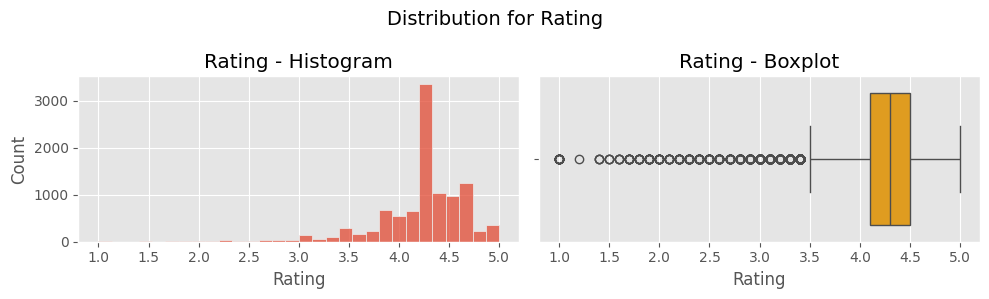

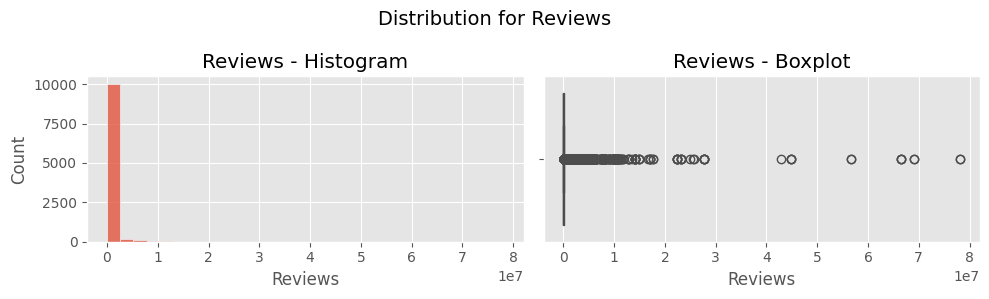

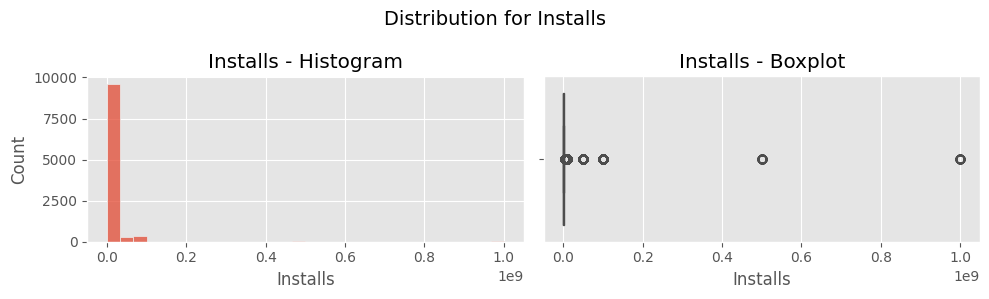

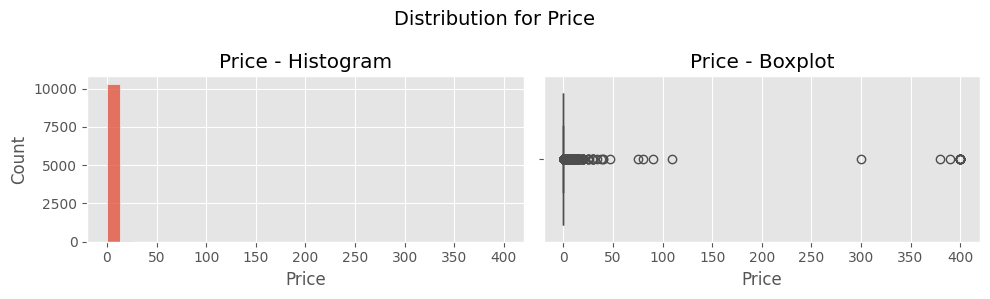

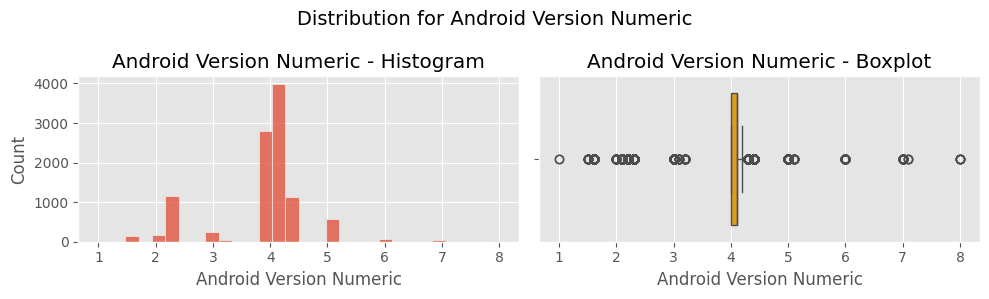

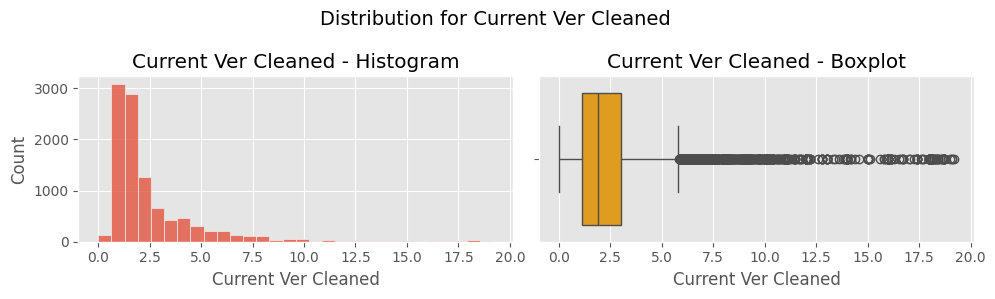

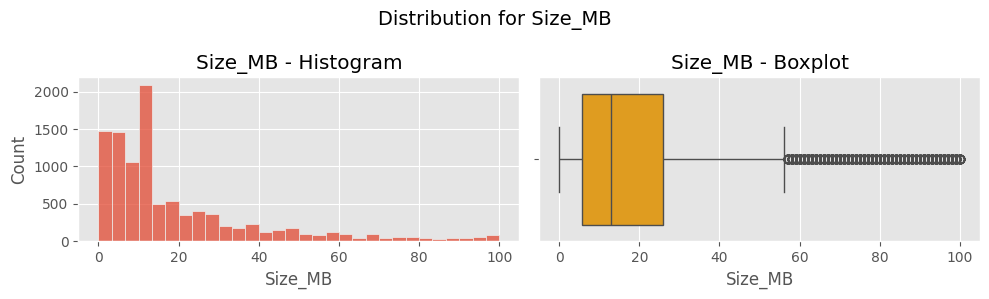

In [128]:
for column in numerical:
    plot_numeric_distribution(df, column)

##### Dealing with Outliers

For Reviews and Installs: The extreme outliers cause the x-axis to scale disproportionately, leading to a compression of the main body of the data (values between 0 and 1) and making it appear tightly packed. The presence of scientific notation on the x-axis further emphasizes the vast range of values present in the dataset.
Before, we checked the max values that cause the x-axis to scale disproportionately, and they seem reasonable.

In other columns, there are outliners as well, we will perform log transformations on the columns that the log trasnformation turned out successful in order to pull in high numbers.

In [129]:
df['logReviews'] = df['Reviews'].mask(df['Reviews'] == 0, 1)
df['logReviews'] = np.log10(df['logReviews'])

In [130]:
df['logInstalls'] = df['Installs'].mask(df['Installs'] == 0, 1)
df['logInstalls'] = np.log10(df['logInstalls'])

In [131]:
df['logSize_MB'] = df['Size_MB'].mask(df['Size_MB'] == 0, 1)
df['logSize_MB'] = np.log10(df['logSize_MB'])

In [132]:
cols_before_after = ['Reviews', 'logReviews', 'Installs', 'logInstalls', 'Size_MB', 'logSize_MB']

This is the before and after of the log transformation of columns

for column in cols_before_after:
    plot_numeric_distribution(df, column)

Dropping the original columns before the transformation

In [133]:
df = df.drop(['Reviews', 'Installs', 'Size_MB'], axis=1)

In [134]:
numerical = ['Rating','logReviews', 'logInstalls', 'Price', 'Android Version Numeric', 'Current Ver Cleaned', 'logSize_MB']
df.shape

(10342, 15)

##### Categorical Columns

In [135]:
#categorical = ['Category', 'Type', 'Content Rating', 'Genres']

In [136]:
# Calculate counts and percentages
category_counts = df['Category'].value_counts()
category_percentages = (category_counts / len(df)) * 100

# Create a DataFrame for better handling
category_summary = pd.DataFrame({
    'Counts': category_counts,
    'Percentage': category_percentages
}).sort_values(by='Counts', ascending=False)

# Display results
print("Category Counts and Percentages (Sorted):")
print("-" * 40)
for category, row in category_summary.iterrows():
    print(f"{category}: {row['Counts']} ({row['Percentage']:.2f}%)")

Category Counts and Percentages (Sorted):
----------------------------------------
FAMILY: 1940.0 (18.76%)
GAME: 1121.0 (10.84%)
TOOLS: 843.0 (8.15%)
BUSINESS: 426.0 (4.12%)
MEDICAL: 407.0 (3.94%)
PRODUCTIVITY: 406.0 (3.93%)
PERSONALIZATION: 387.0 (3.74%)
LIFESTYLE: 372.0 (3.60%)
COMMUNICATION: 366.0 (3.54%)
FINANCE: 358.0 (3.46%)
SPORTS: 351.0 (3.39%)
PHOTOGRAPHY: 322.0 (3.11%)
HEALTH_AND_FITNESS: 306.0 (2.96%)
SOCIAL: 278.0 (2.69%)
NEWS_AND_MAGAZINES: 263.0 (2.54%)
TRAVEL_AND_LOCAL: 236.0 (2.28%)
BOOKS_AND_REFERENCE: 230.0 (2.22%)
SHOPPING: 224.0 (2.17%)
DATING: 196.0 (1.90%)
VIDEO_PLAYERS: 175.0 (1.69%)
MAPS_AND_NAVIGATION: 137.0 (1.32%)
EDUCATION: 130.0 (1.26%)
FOOD_AND_DRINK: 124.0 (1.20%)
ENTERTAINMENT: 111.0 (1.07%)
AUTO_AND_VEHICLES: 85.0 (0.82%)
LIBRARIES_AND_DEMO: 85.0 (0.82%)
WEATHER: 82.0 (0.79%)
HOUSE_AND_HOME: 80.0 (0.77%)
ART_AND_DESIGN: 64.0 (0.62%)
EVENTS: 64.0 (0.62%)
COMICS: 60.0 (0.58%)
PARENTING: 60.0 (0.58%)
BEAUTY: 53.0 (0.51%)


In [137]:
def display_category_summary(df, column):
    # Calculate counts and percentages
    category_counts = df[column].value_counts()
    category_percentages = (category_counts / len(df)) * 100

    # Create a DataFrame for better handling and sorting
    category_summary = pd.DataFrame({
        'Counts': category_counts,
        'Percentage': category_percentages
    }).sort_values(by='Counts', ascending=False)

    # Display results as a table
    print(f"Category Summary for '{column}':")
    print("-" * 40)
    print(category_summary.reset_index().rename(columns={'index': column}))

for column in categorical:
    display_category_summary(df, column)

Category Summary for 'Category':
----------------------------------------
               Category  Counts  Percentage
0                FAMILY    1940   18.758461
1                  GAME    1121   10.839296
2                 TOOLS     843    8.151228
3              BUSINESS     426    4.119126
4               MEDICAL     407    3.935409
5          PRODUCTIVITY     406    3.925740
6       PERSONALIZATION     387    3.742023
7             LIFESTYLE     372    3.596983
8         COMMUNICATION     366    3.538967
9               FINANCE     358    3.461613
10               SPORTS     351    3.393928
11          PHOTOGRAPHY     322    3.113518
12   HEALTH_AND_FITNESS     306    2.958809
13               SOCIAL     278    2.688068
14   NEWS_AND_MAGAZINES     263    2.543028
15     TRAVEL_AND_LOCAL     236    2.281957
16  BOOKS_AND_REFERENCE     230    2.223941
17             SHOPPING     224    2.165925
18               DATING     196    1.895185
19        VIDEO_PLAYERS     175    1.692129
20

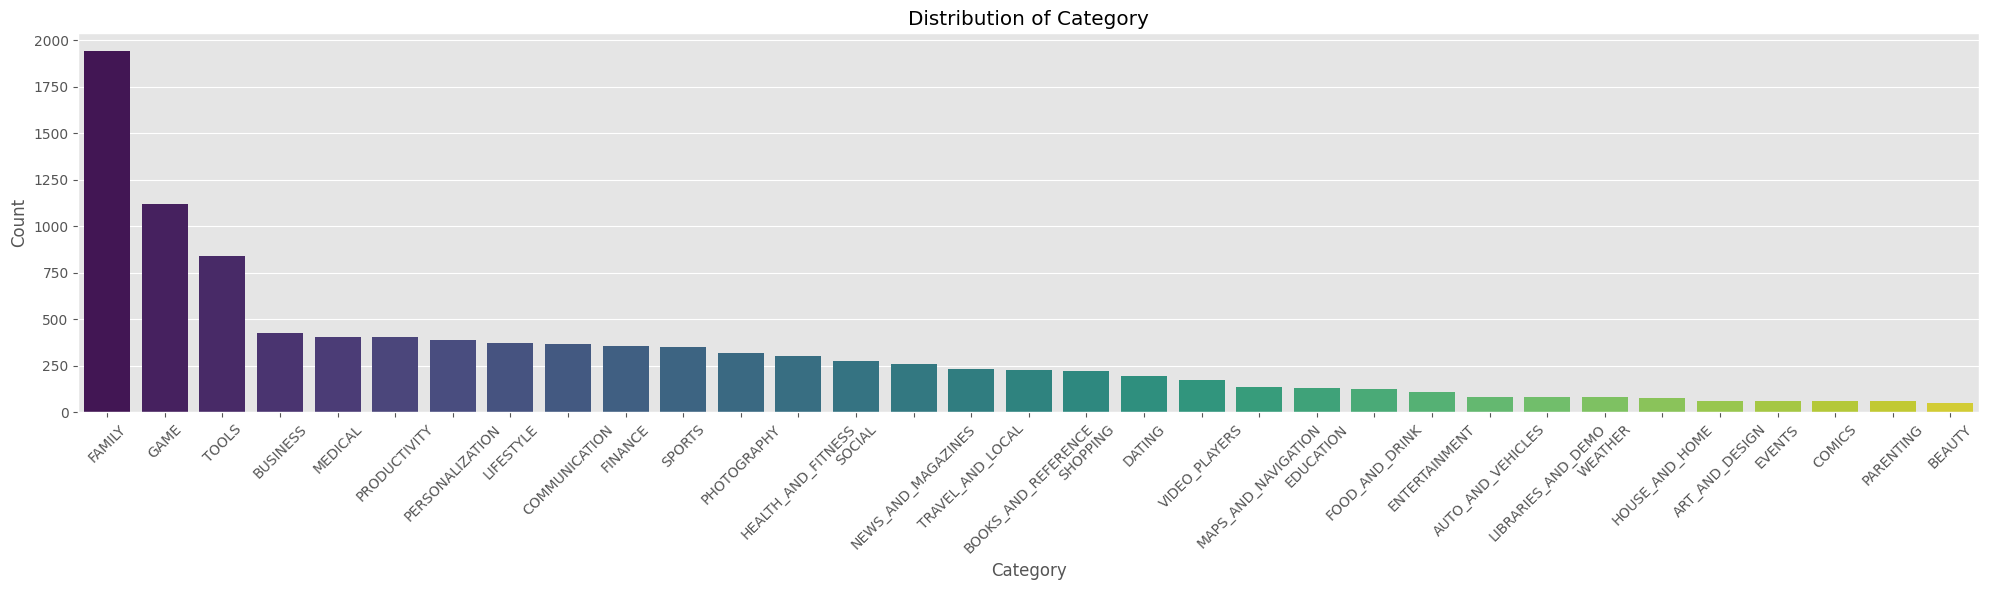

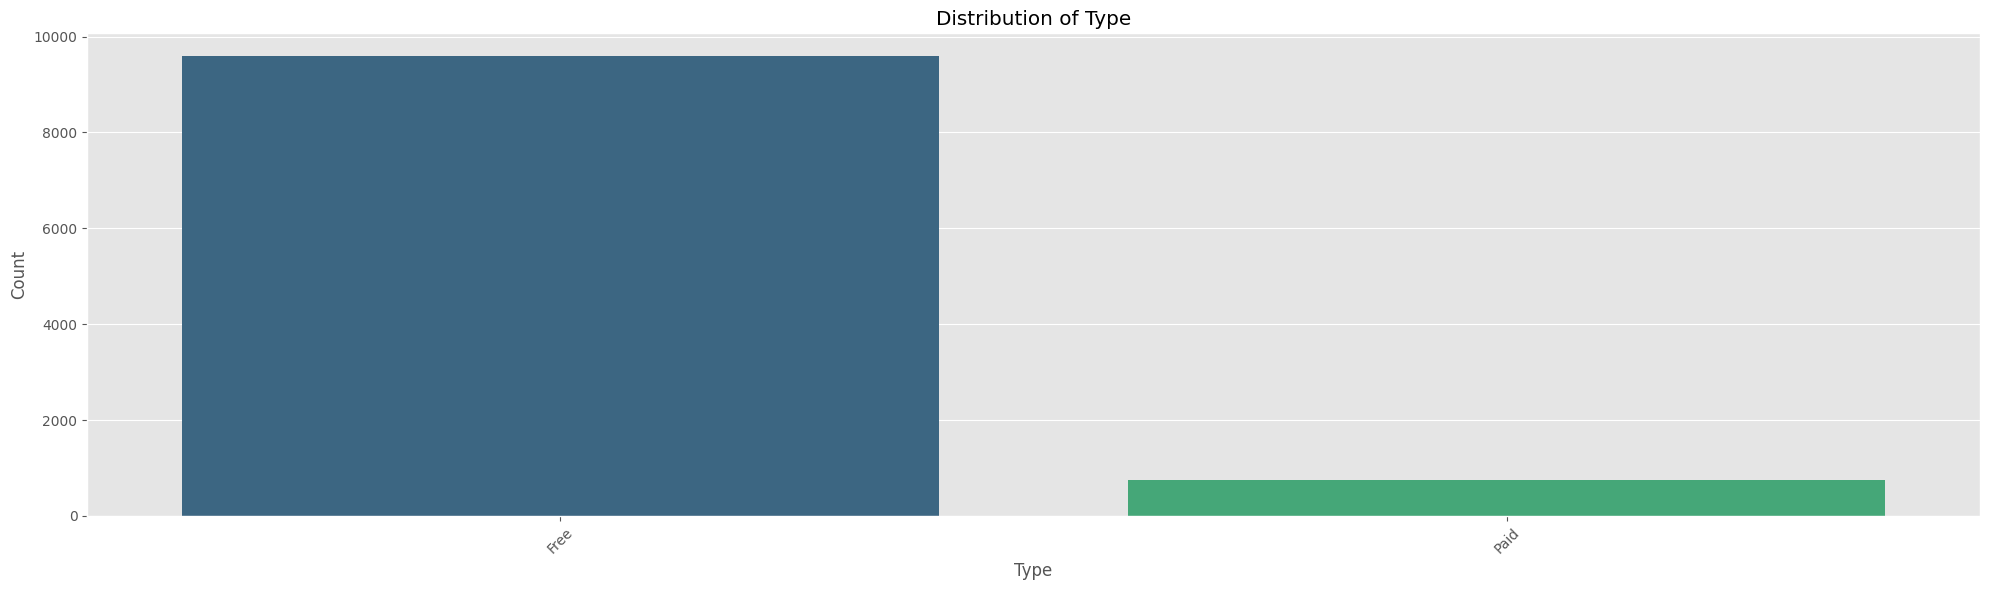

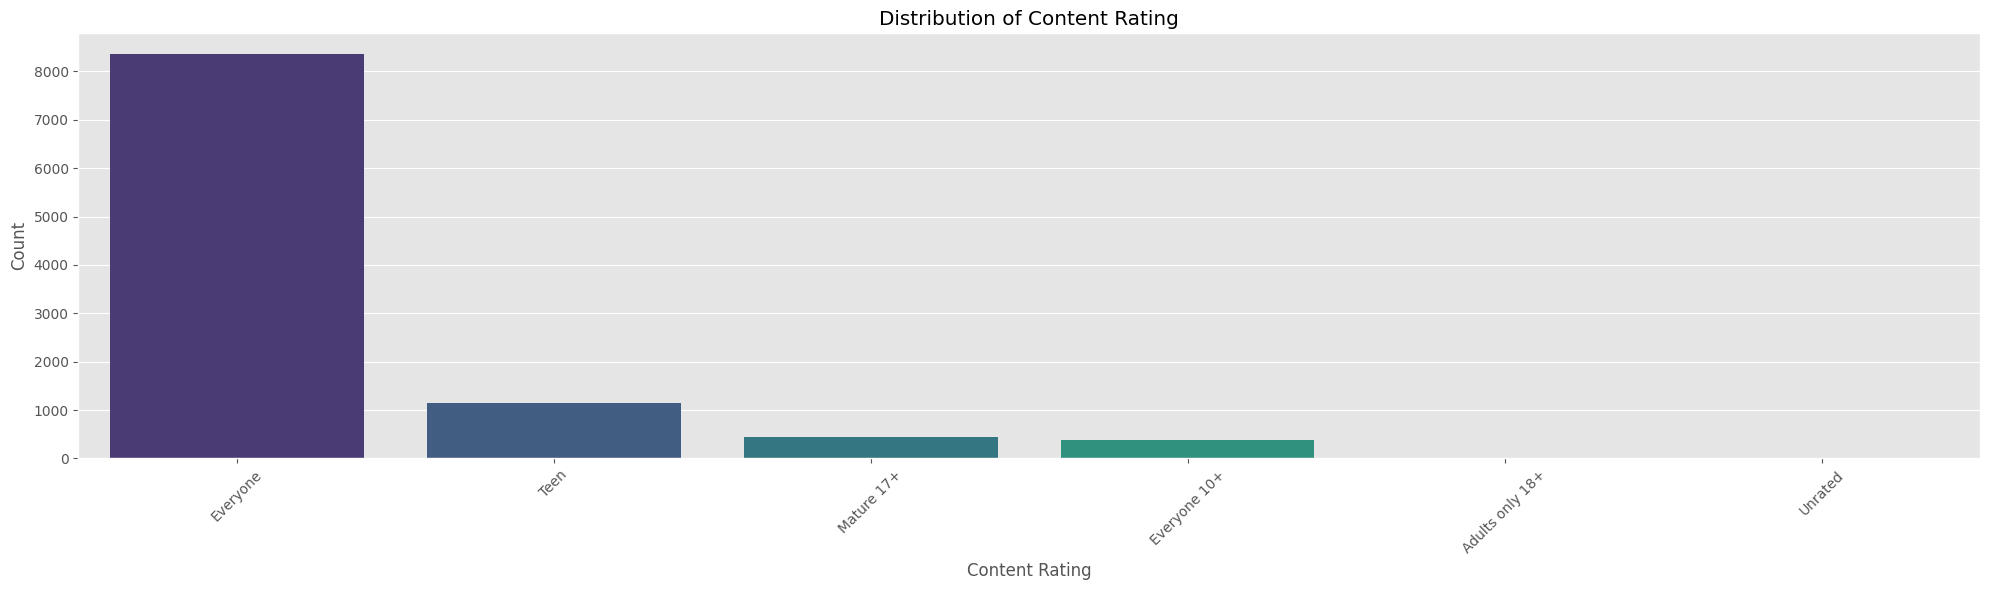

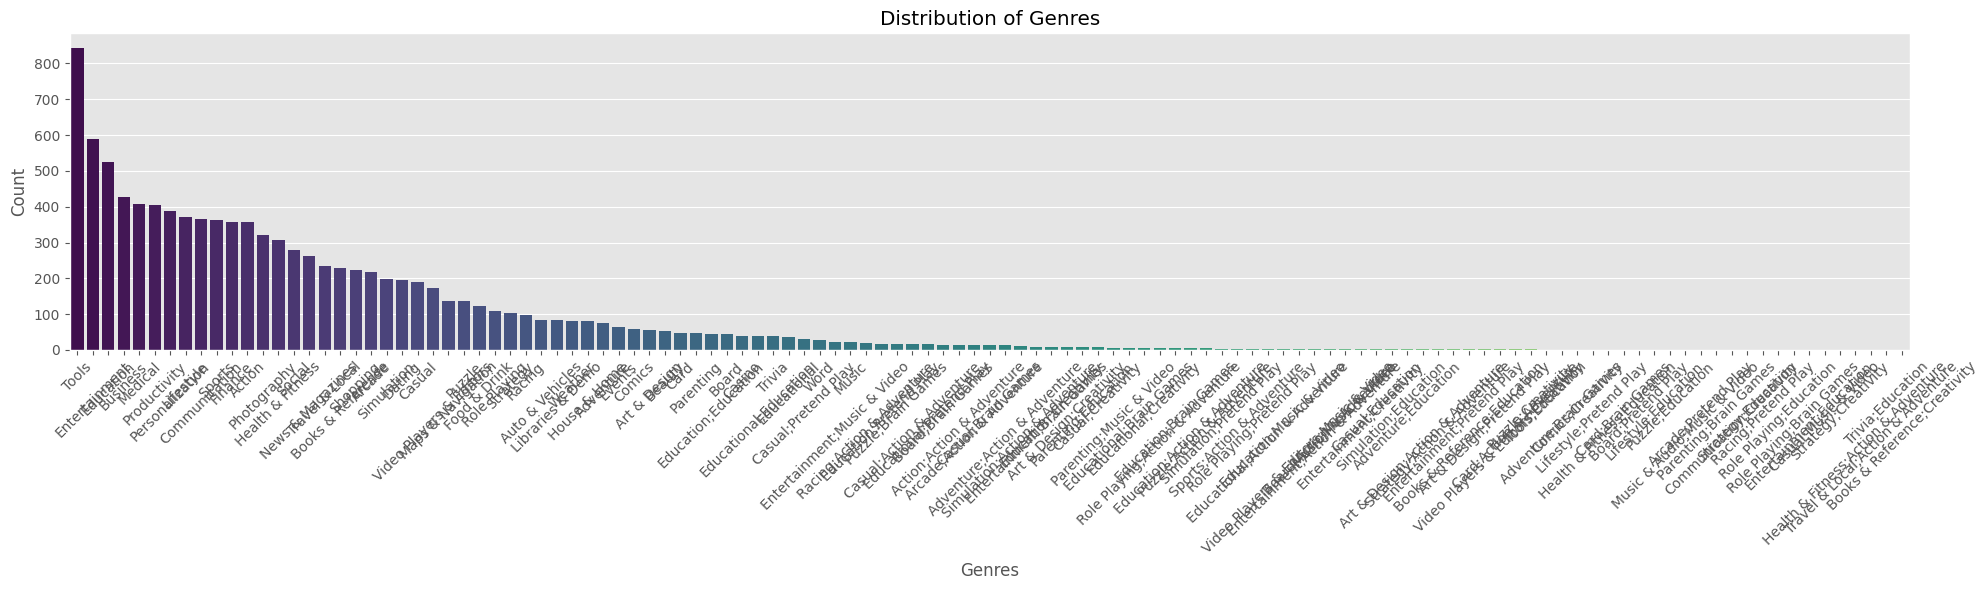

In [138]:
def plot_category_distribution(df, column):
    # Calculate counts and percentages
    counts = df[column].value_counts()
    percentages = (counts / len(df)) * 100

    # Create a bar plot
    plt.figure(figsize=(20, 6))
    bar_plot = sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette='viridis', legend=False)
    
    # Set titles and labels
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

for column in categorical:
    plot_category_distribution(df, column)

<div style='font-size:15px'>

<b> Observations: </b>
* <b> Category </b>
    * The FAMILY category leads significantly, comprising 18.76% of the total apps, indicating a strong market focus on family-oriented applications.
    * The GAME category accounts for 10.84% of the total apps, indicating a high popularity of gaming apps in the mobile market.
    * The TOOLS category represents 8.15% of the total apps, indicating significant demand for applications aimed at enhancing users' personal or
      professional efficiency.
* <b> Type </b>
    * A vast majority of apps (92.7%) are Free, highlighting the prevalent freemium model in the app market. This suggests that developers may rely on
      in-app purchases or advertising for revenue.
    * Paid apps represent only 7.3%, indicating a cautious consumer attitude towards paid applications, emphasizing the importance of perceived value.
* <b> Content Rating </b>
    * Most apps are rated for Everyone (80.93%), which suggests a significant focus on broad accessibility. This aligns with the high proportion of
      family and games observed earlier.
    * Teen (11.06%) and Mature 17+ (4.32%) categories cater to specific age groups, indicating a conscious effort by developers to address different
      demographics.
* <b> Genre </b>
    * The Tools genre is the most common with 8.14%, followed closely by Entertainment (5.69%) and Education (5.08%). This suggests a balanced variety
      of utility and leisure applications available.
    * The presence of combined genres, such as Lifestyle;Pretend Play and Comics;Creativity, shows that many apps cater to multi-faceted user
      interests. However, the low counts of these combinations indicate they might be highly niche.

### Bivariate Analysis

#### Numerical to Numerical

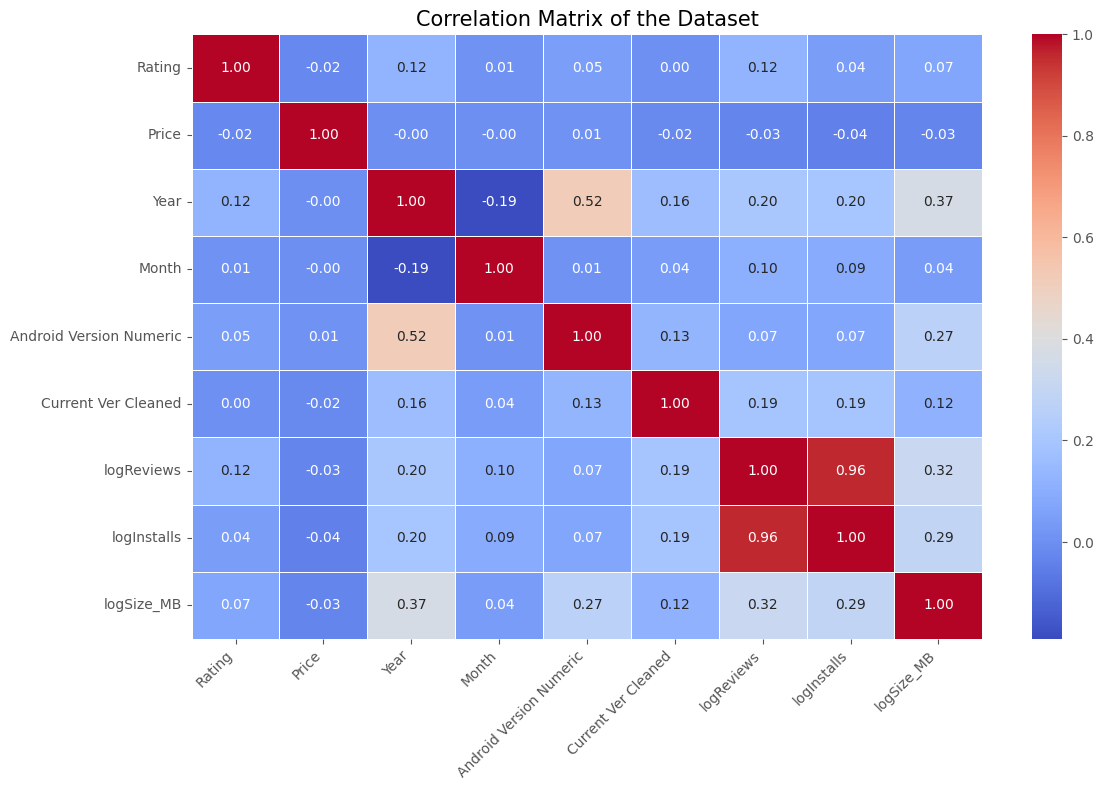

In [139]:
numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32'])
# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
    
# Set titles and labels
plt.title('Correlation Matrix of the Dataset', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

* Despite common sense, there is no correlation between price and any of the numerical columns, not the number of installs, the number of reviews and the size of the app. This may be a cause of outliners beacuse most of the apps in the data set are free.
* we can withness a very strong correlation between the reviews and the installs.
* There is a slight correlation between last updated year and android version.
* There is also a weak correlation between android version and year.

In [140]:
def plot_scatter_with_trend(df, x_column, y_column):
    plt.figure(figsize=(10, 6))
    # Create scatter plot with trend line
    sns.regplot(x=df[x_column], y=df[y_column], scatter_kws={'s': 10}, line_kws={'color': 'red'}, ci=None)
    
    # Customize plot labels and title
    plt.title(f'Scatter Plot of {x_column} vs {y_column} with Trend Line', fontsize=14)
    plt.xlabel(x_column, fontsize=12)
    plt.ylabel(y_column, fontsize=12)
    
    # Show the plot
    plt.show()

<b>logReviews and logInstalls

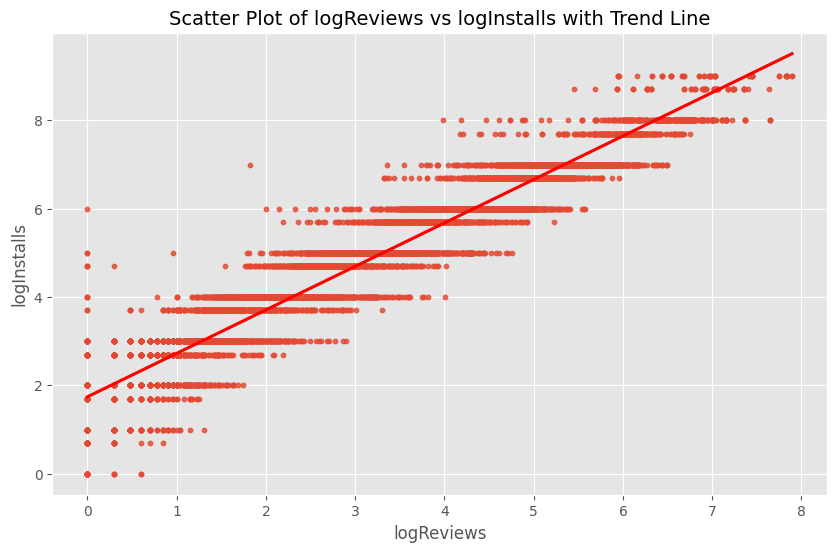

In [141]:
plot_scatter_with_trend(df, 'logReviews', 'logInstalls')

The scatter plot shows a strong positive linear relationship between logReviews and logInstalls, as indicated by the points closely following the red trend line. This suggests that, on a logarithmic scale, there is a proportional increase in installs as the number of reviews grows, which is reasonable.

<b> Android Version and Year

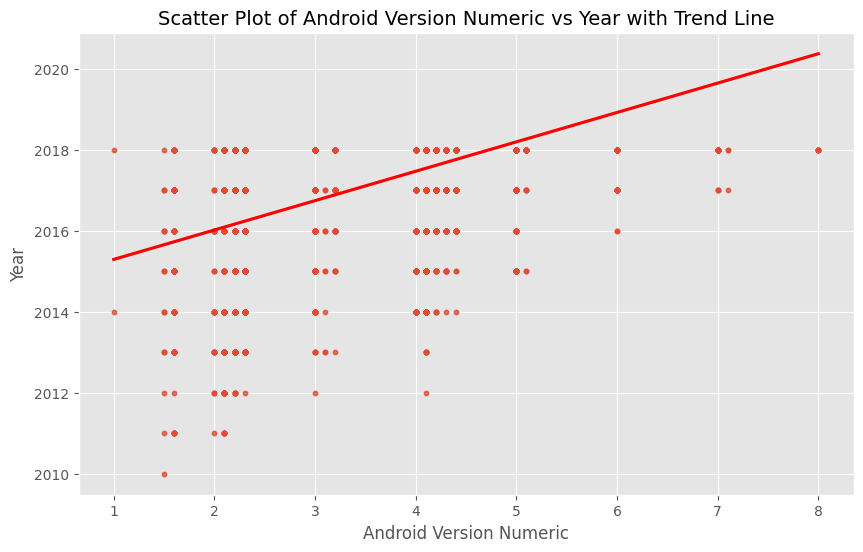

In [142]:
plot_scatter_with_trend(df, 'Android Version Numeric', 'Year')

* There's a clear positive correlation between Android Version Numeric and Year, as indicated by the upward trend line.
* This correlation suggests that apps with higher Android Version Numeric values tend to have been updated more recently.
* This shows that older Android versions continue to be supported and updated, even as newer versions are released.

As new Android versions are released, developers update their apps to support these newer versions. However, to maintain compatibility with a wide range of devices, many developers continue to update apps for older Android versions as well. 

<b> Android Version and Year

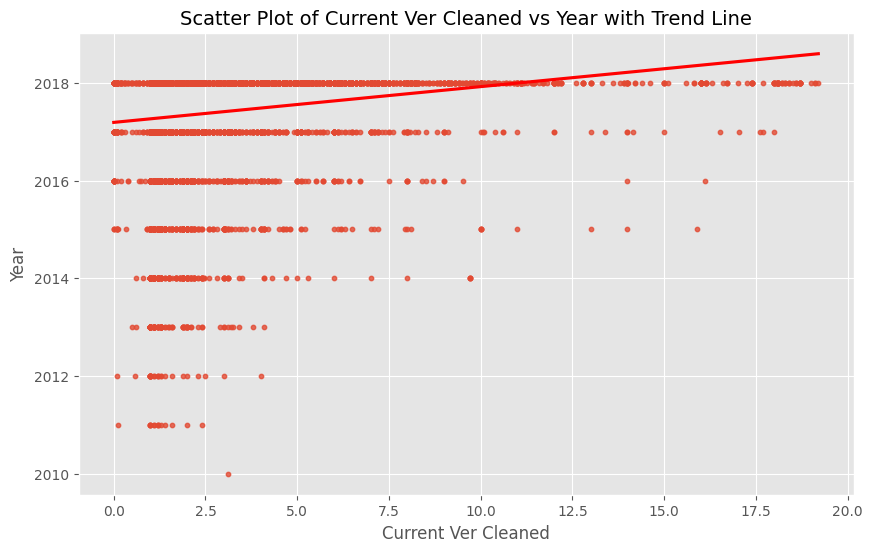

In [143]:
plot_scatter_with_trend(df, 'Current Ver Cleaned', 'Year')

* There's a weak positive correlation between Current Ver Cleaned and Year, as shown by the slightly upward trend line.
* The majority of data points are clustered in the more recent years (2017-2018), indicating that most apps in the dataset have been updated recently.
* There's a notable horizontal banding pattern, particularly strong for the years 2018, 2017, and 2016. This pattern suggests that the dataset contains   many apps that were actively maintained up to these years, with 2018 appearing to be the most recent year in the dataset. The variety of version        numbers along these lines shows that apps were at different stages of development when they were last updated.

<b> App size and Year

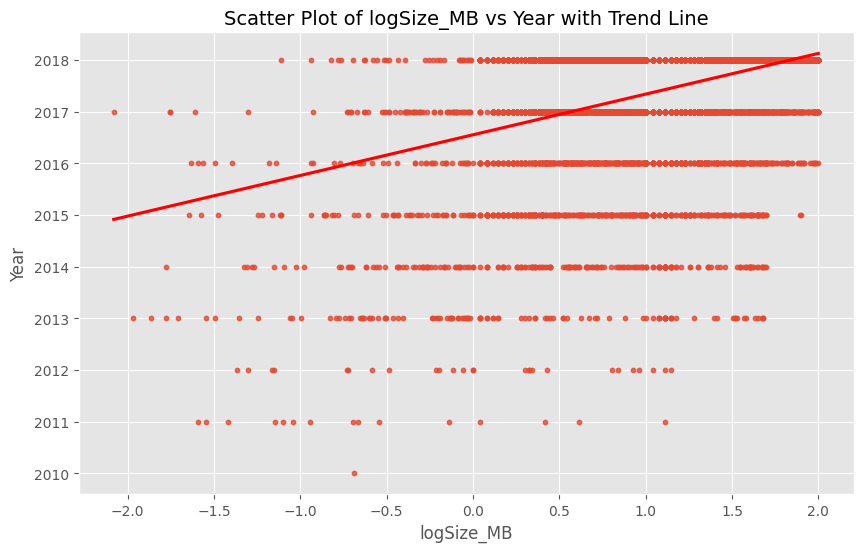

In [144]:
plot_scatter_with_trend(df, 'logSize_MB', 'Year')

* There's a clear positive correlation between logSize_MB and Year, indicated by the upward trend line, suggesting that more recently updated apps tend to have larger file sizes, which is reasonable.
* The data points are heavily concentrated in the years 2014-2018, with particularly dense horizontal bands for 2017 and 2018, indicating that most       apps in the dataset were updated in recent years.
* There's a wide spread of logSize_MB values for each year, ranging from approximately -2 to 2, which shows that in any given year, we can find both
  small and large apps being updated, though larger sizes become more common in recent years.

<b> App size and Rating</b>

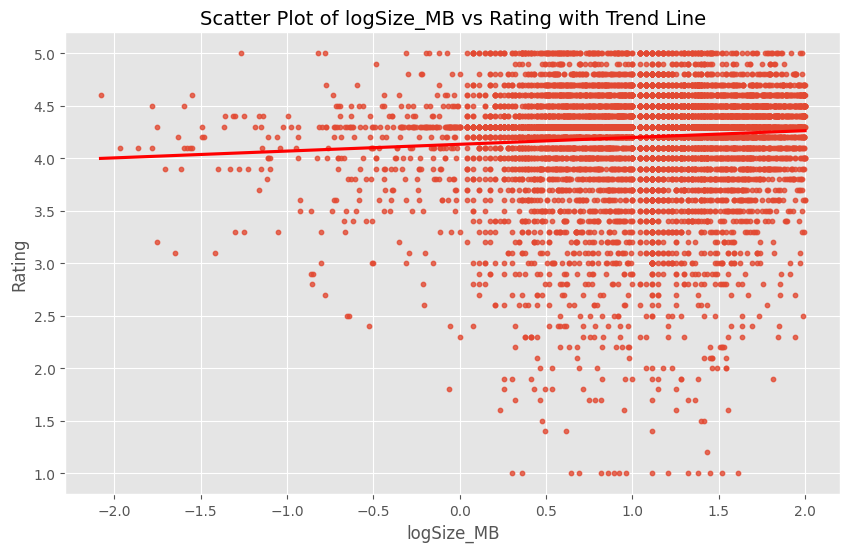

In [146]:
plot_scatter_with_trend(df, 'logSize_MB', 'Rating')

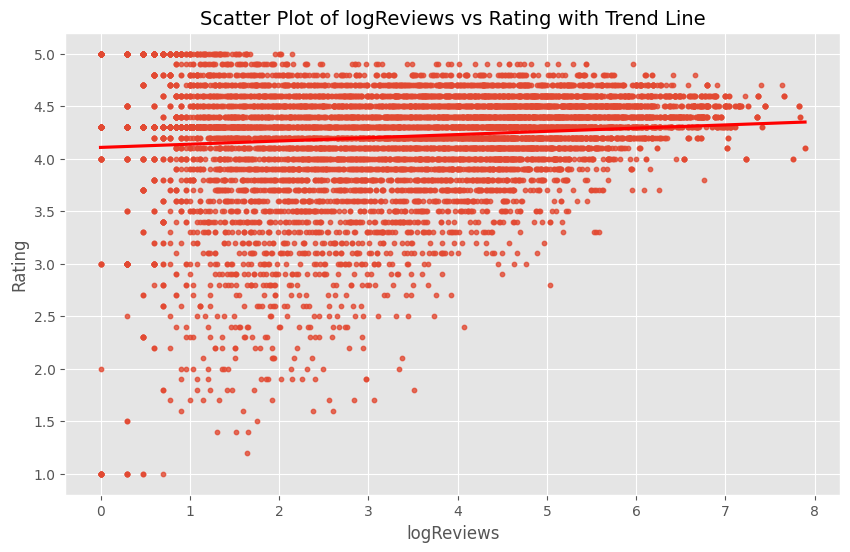

In [147]:
plot_scatter_with_trend(df, 'logReviews', 'Rating')

* The correlation between the number of reviews and the rating is likely weak or moderate. It's not strong enough to confidently conclude that a significant increase in reviews will lead to a significant increase in rating.

#### Categorical to Numerical

Function to plot a box plot of a numeric column against a categorical column.

In [148]:
def plot_numeric_vs_categorical(df, numeric_col, categorical_col):
    plt.figure(figsize=(15, 6))
    title = f'Box Plot of {numeric_col} by {categorical_col}'
    plt.title(title, fontsize=14)
    sns.boxplot(x=categorical_col, y=numeric_col, showmeans=True, data=df)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<b> Price and Type

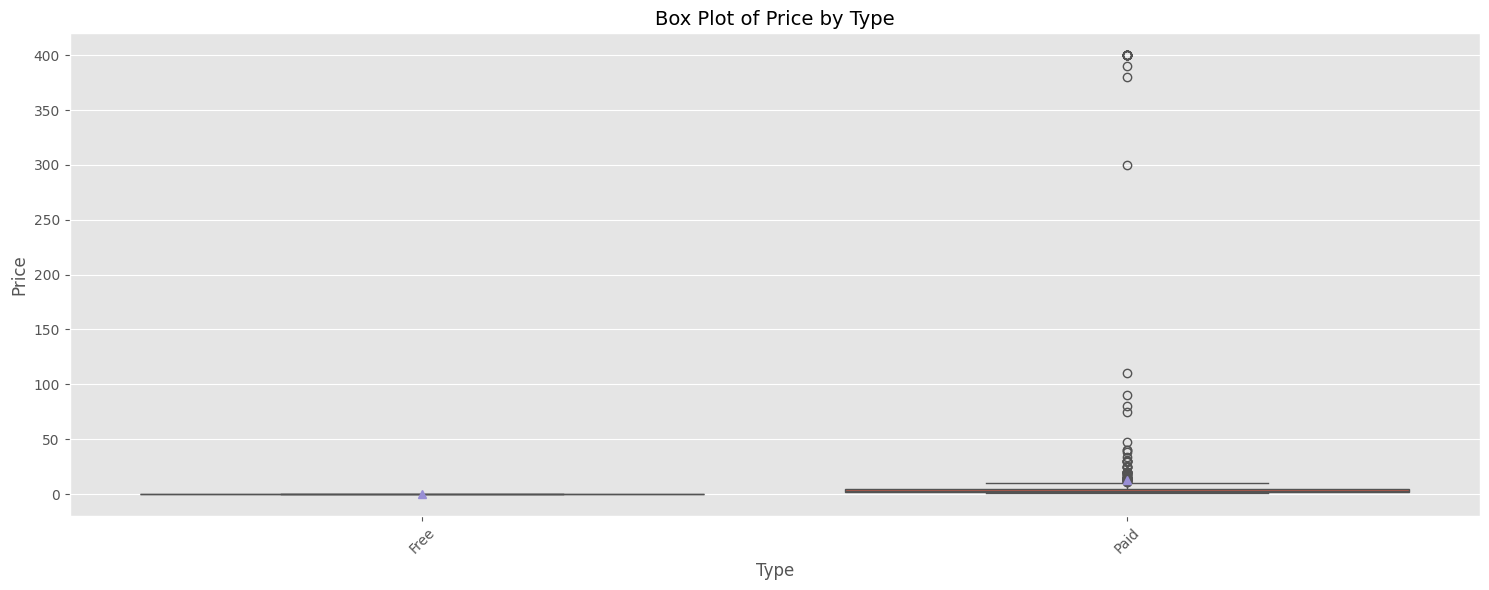

In [149]:
plot_numeric_vs_categorical(df, 'Price', 'Type')

* As expected, the box plot for free apps is essentially a single line at the 0 mark, indicating that all free apps have a price of 0.
* The tiny size of the box of paid apps implies a narrow interquartile range, meaning that the middle 50% of paid apps have prices that are very close
  to each other.
* while there are some paid apps with very high or very low prices (as indicated by the outliers), the majority of paid apps are priced quite
  similarly, likely reflecting a common pricing strategy or market standard.

<b> Android Version and Type

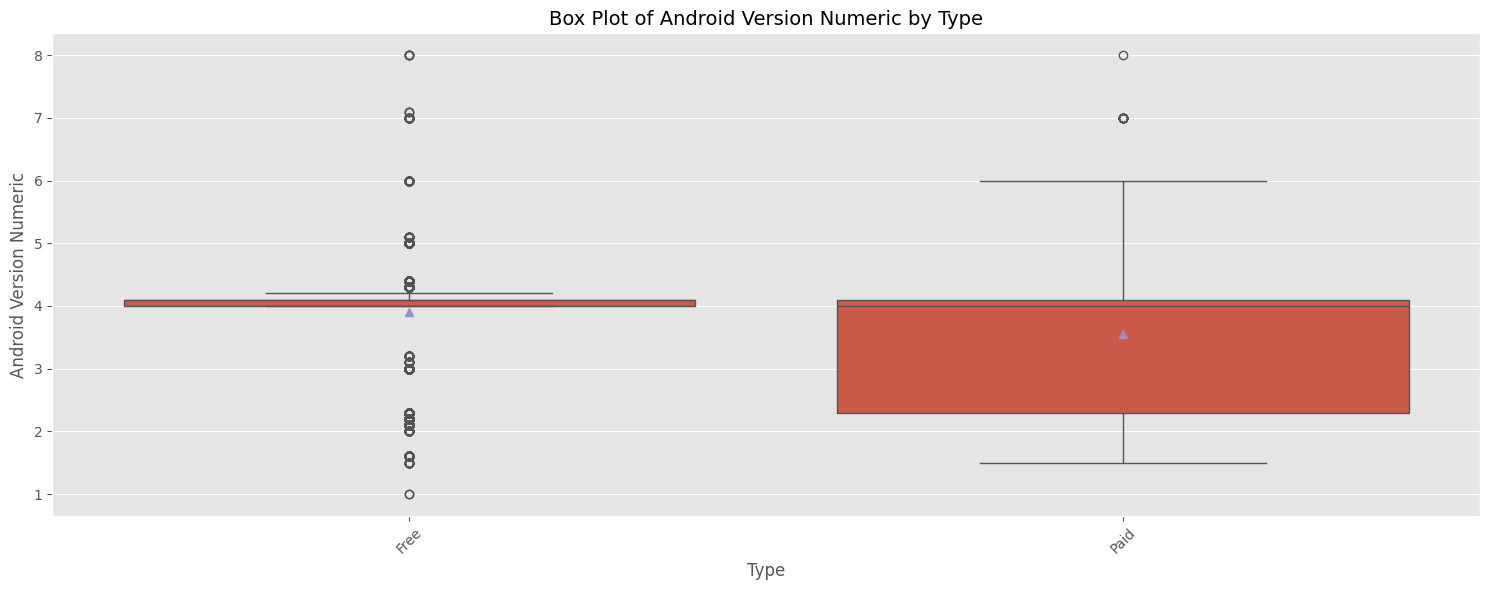

In [150]:
plot_numeric_vs_categorical(df, 'Android Version Numeric', 'Type')

* The median Android version for paid apps is higher, indicating that paid apps are more likely to require newer Android versions.
* The IQR for free apps is relatively small, suggesting that the distribution of Android versions used by free apps is relatively concentrated,
  while the IQR for paid apps is larger, indicating a wider range of Android versions supported by paid apps.
* The box plot suggests that paid apps are more likely to be designed for and compatible with newer Android versions(no lower outliners). This could be due to factors such as the need for more advanced features or hardware capabilities in newer versions, or the desire to target a more recent user base.

<b> Android Version and Category

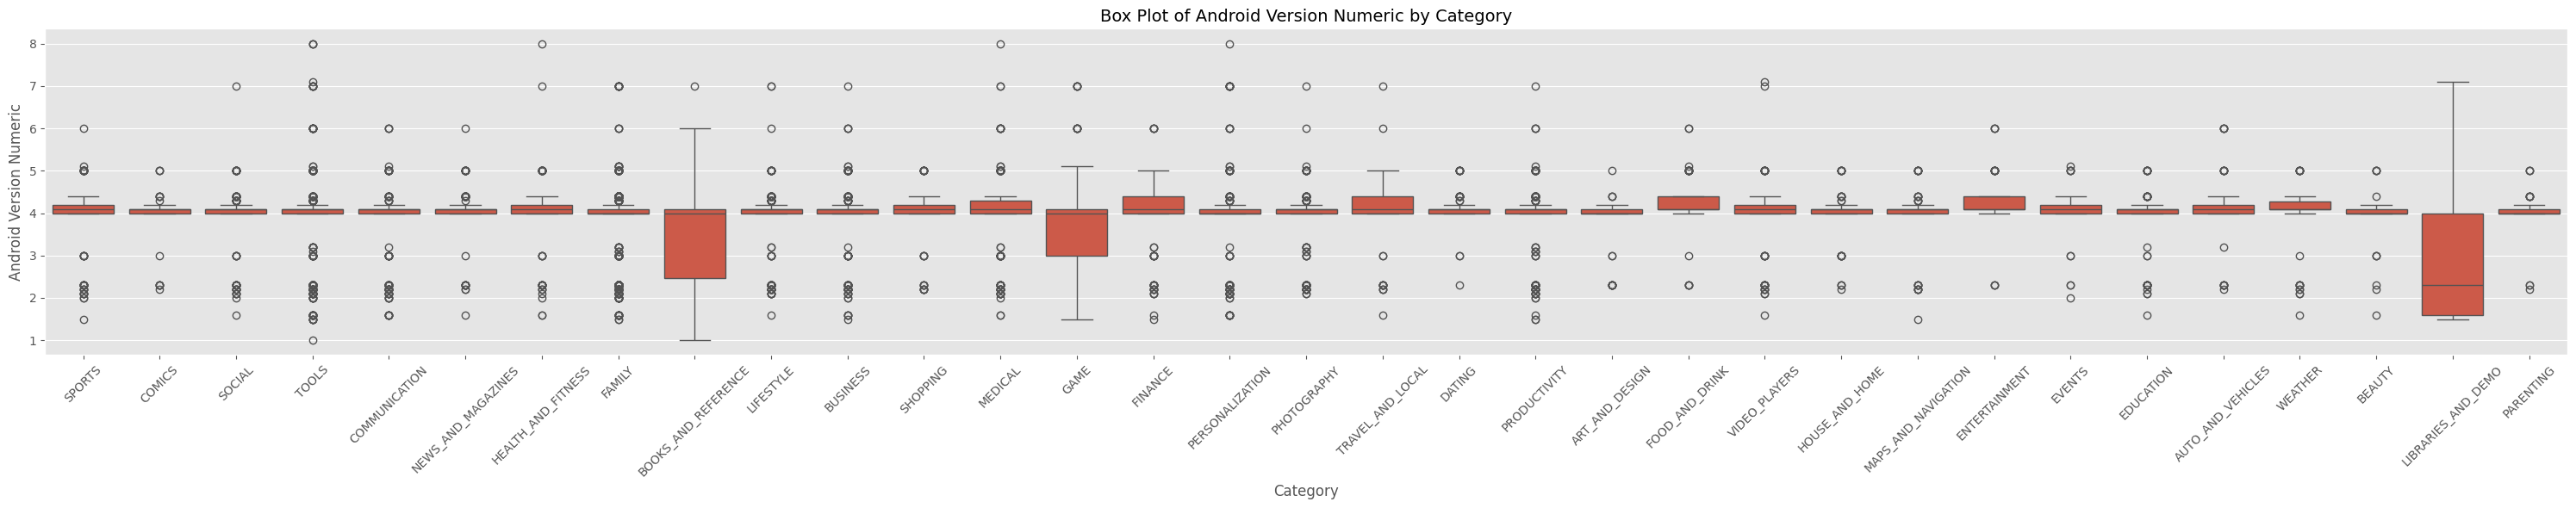

In [151]:
    plt.figure(figsize=(30, 6))
    title = f'Box Plot of Android Version Numeric by Category'
    plt.title(title, fontsize=14)
    sns.boxplot(x='Category', y='Android Version Numeric', data=df)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
#plot_numeric_vs_categorical(df, 'Android Version Numeric', 'Category')

* The boxplots of most of the categories are small, this implies that there is a small range of android versions supported by apps in those categories.
* The IQR of the following categories: BOOKS_AND_REFERENCE, GAME and LIBRARIES_AND_DEMO is large. This suggests that there is
  a wide range of android versions supported by apps in those categories. This could indicate that these categories are more
  diverse in terms of the target audience or the features offered by the apps.
* Apps in these categories might receive frequent updates to incorporate new features or content, which could lead to
  compatibility issues with older Android versions.
* Games for example, as we have seen before is a very popular category. Apps in this category might require a wider range of
  Android versions to support different devices and graphics capabilities.

 <b> We will dive to some of the popular categories to analyze trends </b> <br>
 As we have seen before, those are the 4 most popular categories:
* FAMILY - 18.76%
* GAME - 10.83%
* TOOLS - 8.15%
* BUSINESS - 4.12%

In [152]:
df_pop_cat = df[(df['Category'] == 'FAMILY') | (df['Category'] == 'GAME') | (df['Category'] == 'TOOLS') | (df['Category'] == 'BUSINESS')]
df_pop_cat.sample(40)

,App,Category,Rating,Type,Price,Content Rating,Genres,Last Updated,Year,Month,Android Version Numeric,Current Ver Cleaned,logReviews,logInstalls,logSize_MB
8999,Fahrschule DW,FAMILY,4.3,Free,0.00,Everyone,Education,2016-04-19,2016,4,2.2,1.20,0.698970,3.00000,0.591065
8760,Dr. Truck Driver : Real Truck Simulator 3D,FAMILY,4.1,Free,0.00,Everyone 10+,Simulation,2018-07-05,2018,7,4.1,1.80,3.211121,5.00000,1.982271
4154,G-Switch 2,GAME,4.4,Free,0.00,Everyone,Action,2018-02-05,2018,2,2.3,1.10,4.103222,6.00000,1.278754
1935,DRAGON BALL LEGENDS,GAME,4.6,Free,0.00,Teen,Action,2018-08-03,2018,8,6.0,1.11,5.528805,6.69897,1.681241
6733,BS Films,FAMILY,4.3,Free,0.00,Everyone,Entertainment,2017-12-12,2017,12,4.3,2.00,0.000000,2.00000,1.380211
6573,Bomber Friends,GAME,4.5,Free,0.00,Everyone 10+,Action,2018-07-26,2018,7,4.0,2.23,5.890270,7.00000,1.690196
2184,Papumba Academy - Fun Learning For Kids,FAMILY,4.4,Free,0.00,Everyone,Education;Education,2018-07-11,2018,7,4.2,1.00,2.695482,5.00000,1.973128
9666,4Eternity EO,BUSINESS,4.3,Free,0.00,Everyone,Business,2018-01-17,2018,1,4.1,1.20,0.000000,1.00000,0.301030
1992,Hill Climb Racing 2,GAME,4.6,Free,0.00,Everyone,Racing,2018-08-02,2018,8,4.2,1.17,6.439435,8.00000,1.113943
1847,PUBG MOBILE,GAME,4.4,Free,0.00,Teen,Action,2018-07-24,2018,7,4.3,0.70,6.570108,7.69897,1.556303


Seems like the family category contains games that are targeted to everyone (Content Rating column)

<b> App Size by Popular Categories

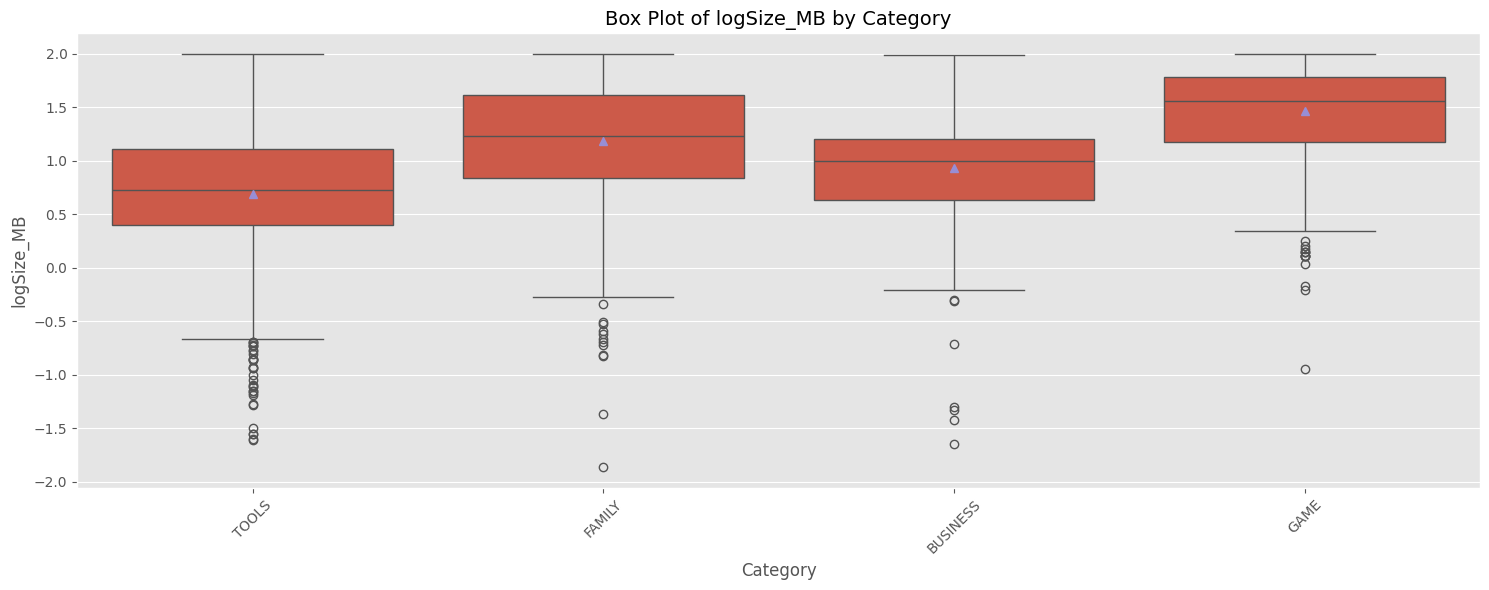

In [153]:
plot_numeric_vs_categorical(df_pop_cat, 'logSize_MB', 'Category')

* Games have the largest storage requirement: The mean and median values for the GAME category are the highest among all categories.As we have seen
  before, this aligns with the expectation that many mobile games, especially complex and graphically intense ones, require more storage compared to
  other app types. The presence of outliers suggests that some games might have particularly small or large storage requirements, likely due to
  variations in game complexity or features.
* Family apps also have relatively high storage needs, The FAMILY category shows the second-highest mean and median, which makes sense since this
  category may also include family-oriented games or educational apps that involve rich content. The rangeof sizes for family apps is broader compared
  to games, suggesting a wide variety of app types.
* Tools and business apps tend to be more lightweight, with fewer storage demands and less variation in app size.
* All categories exhibit some outliers, indicating that within each category there are apps that either require more or less storage
  than the typical app in that group.

<b> Reviews by Popular Categories

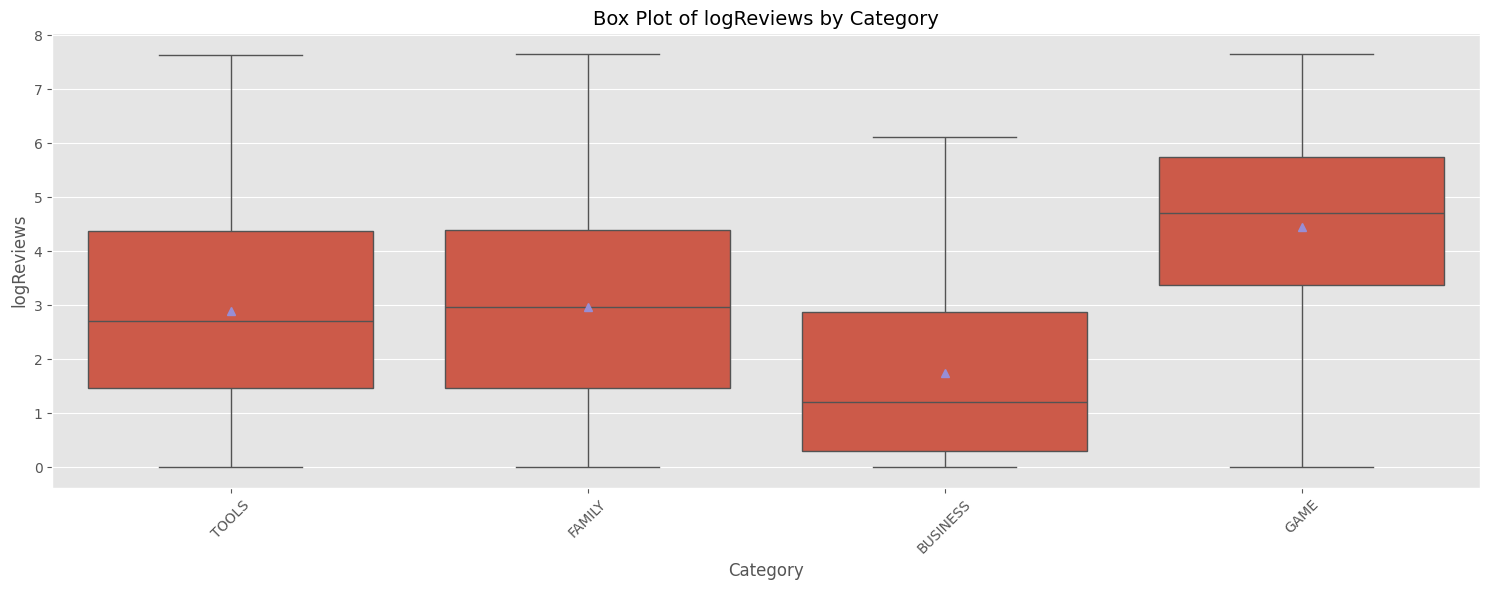

In [154]:
plot_numeric_vs_categorical(df_pop_cat, 'logReviews', 'Category')

* The Game category receives a large number of reviews, as indicated by the high median review count. This suggests that Game apps tend to engage more
* users, leading to more user feedback compared to other categories. 
* The Business category has fewer reviews on average, this suggests less user engagement compared to other categories.
* The lack of outliers in all categories indicates consistency in the range of reviews, even though the total number of reviews varies.
* The Tools, Family, and Game categories show similar patterns in terms of review counts. This implies that these three
  categories tend to receive a comparable number of reviews. 

<b> Installs by Popular Categories

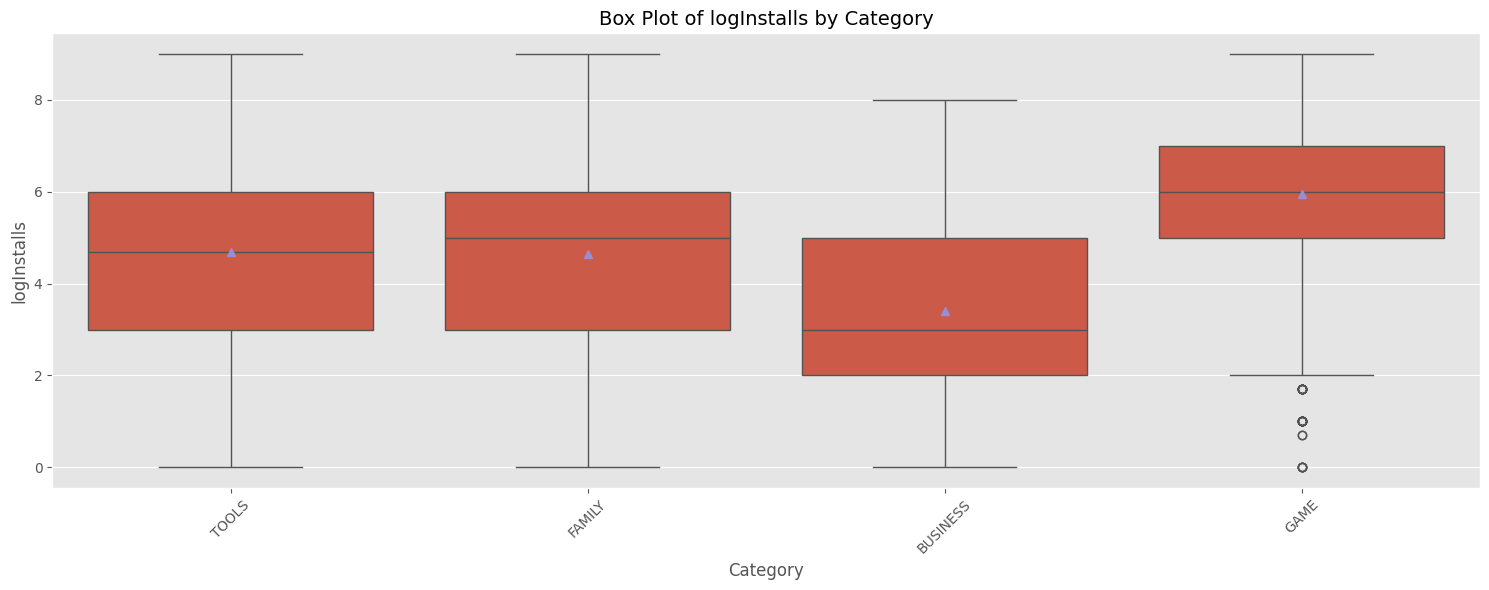

In [155]:
plot_numeric_vs_categorical(df_pop_cat, 'logInstalls', 'Category')

* The Game category shows the highest median of installs, suggesting that apps in this category are very popular. However, some Game apps still
  experience low installs, as evidenced by the outliers.
* The Tools and Family apps show similar patterns in terms of installs, with a broad range of popularity.
* Business apps have a lower number of installs compared to other categories, suggesting they are generally less popular or cater to a smaller audience.

<b> Ratings by Popular Categories

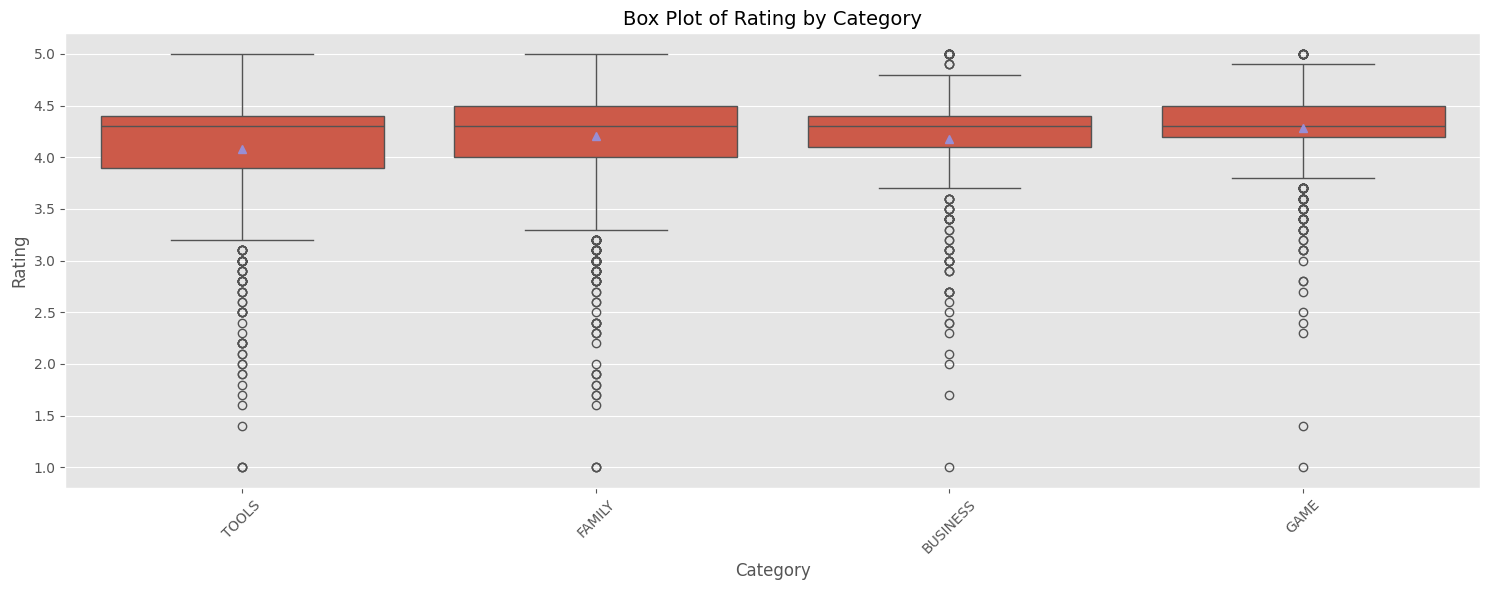

In [156]:
plot_numeric_vs_categorical(df_pop_cat, 'Rating', 'Category')

* The average rating among those categories is very similar, about 4.3.
* There is less variety in the rating in 50% of the apps in the categories Business and Game in comparison to the Family and Tools categories.

### Conclusion

<b> 1. Category Insights

FAMILY is the largest category (18.76%), showing strong market demand for family-friendly apps.

GAME apps are also extremely important (10.83%), confirming the high popularity of gaming in the mobile app market.

TOOLS and BUSINESS apps follow, with a focus on utility and professional efficiency.

<b>2. Games

Games stand out for having:

<b>The highest storage requirements —</b> Games need more space because of rich graphics and complex features.

<b>The highest median installs —</b> Games are among the most downloaded apps, showing massive user interest.

<b>High number of reviews —</b> Strong user engagement compared to other categories.

<b>Stable and high ratings —</b> Average around 4.3, indicating strong user satisfaction.

However, some games have very low installs, meaning <b>competition is fierce</b> and success isn't guaranteed for every game.

Games support a wide range of Android versions, suggesting developers aim to reach as many devices (and users) as possible, but also pointing to challenges in maintaining compatibility.

<b> 3. App Type

92.7% of apps are Free, implying reliance on in-app purchases and ads.

Paid apps are rare (7.3%) and priced similarly (narrow price range).

Paid apps tend to require newer Android versions, hinting that they offer more advanced features.

<b>4. Content Rating

<b>Most apps are rated for Everyone (80.93%)</b>, emphasizing family-friendliness and wide accessibility.

Games and Family apps strongly contribute to this broad accessibility trend.

<b>5. Genres

Tools, Entertainment, and Education are common genres.

Some apps have niche, combined genres (e.g., Lifestyle;Pretend Play), but they are rare.

<b>6. Correlations

Strong correlation between <b>Reviews and Installs</b>: Apps that are downloaded more tend to be reviewed more.

Price is not correlated with installs, reviews, or size — likely because <b>most apps are free</b>.

Recent years show apps are larger in size and support newer Android versions.

Older Android versions are still supported, indicating developers want <b>broad compatibility.

<b>7. General Observations

Most apps in the dataset were updated around 2017–2018.

The size of apps has been <b>increasing over the years</b> — apps today are larger and more content-rich.

The rating across major categories is quite consistent (~4.3 average).

### Suggestions

<b>1. For Game Developers

<b>Invest in quality and optimization:</b> Users expect graphically rich games, but large sizes could discourage downloads on devices with limited storage. Offer a lightweight version or optimize asset management.

<b>Frequent updates:</b> Since users expect compatibility across Android versions, games should be <b>updated regularly</b> to support both old and new versions.

<b>Early User Engagement:</b> Focus on <b>gaining installs and reviews early</b> — initial momentum is crucial because downloads and reviews are tightly linked.

<b>Differentiation Strategy:</b> Since competition is tough, standing out through unique features, branding, or targeting niche sub-genres could be crucial.

<b>2. General App Strategies

<b>Leverage the freemium model wisely:</b> Since the vast majority of apps are free, paid apps must clearly show unique value to convince users to pay upfront.

<b>Target broad audiences:</b> With most apps being rated for <b>Everyone</b>, expanding reach without alienating specific user groups (e.g., by offering customizable experiences) could be beneficial.

<b>Optimize for newer Android versions:</b> Focus efforts on <b>maintaining compatibility</b> but prioritize new features and performance on newer Android versions.

<b>3. Data-Driven Improvement

<b>Use reviews strategically:</b> Since reviews are tightly correlated with installs, encourage reviews actively through in-app prompts and rewards (without being intrusive).

<b>Monitor storage needs:</b> For all apps, particularly games and family apps, pay attention to the growing trend of larger app sizes, and try to <b>minimize unnecessary bloat</b>.

<b>4. Explore Niche Opportunities

While mainstream categories (Family, Games, Tools) dominate, <b>niche combined genres (like Comics;Creativity) could offer untapped markets for innovative apps</b>.